<a href="https://colab.research.google.com/github/fawazalrasyid/BETACOV/blob/master/Statis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS BESAR STATISTIKA**
Diajukan untuk memenuhi salah satu tugas Mata Kuliah Statistika

Anggota Kelompok:

1. Ahmad Fauzan Gendewa | 1301213162
2. Fawaz Al Rasyid | 1301213106
3. Gibran Ariq Natakusuma | 1301213180
4. Naufal Alfarisi | 1301213452

Kelas IF-45-11


---


**Pendahuluan**

Menurut Organisasi Kesehatan Dunia (WHO) stroke adalah penyebab kematian ke-2 secara global, bertanggung jawab atas sekitar 11% dari total kematian.
Dataset ini digunakan untuk memprediksi kemungkinan pasien terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

Dataset yang akan digunakan adalah healthcare-dataset-stroke-data. Dataset yang diimport pada file colab ini dimasukan ke dalam variabel data dan setelah dilakukan cleaning menjadi data_clean. Sumber data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

---


**Informasi Atribut**



1. id: pengenal unik
2. gender: "Male", "Female" atau "Other"
3. age: usia pasien
4. hypertension: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi
5. heart_disease: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung
6. ever_married: "Tidak" jika belum pernah menikah atau "Ya" jika sudah pernah menikah
7. work_type: "children", "Govt_jov", "Never_worked", "Private" atau "Self-employed"
8. Residence_type: "Rural" atau "Urban"
9. avg_glucose_level: tingkat glukosa rata-rata dalam darah
10. bmi: indeks massa tubuh
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 jika pasien mengalami stroke atau 0 jika tidak
*Catatan*: "Unknown" pada smoking_status berarti informasi tersebut tidak tersedia untuk pasien ini








#**Install Package dan Import Library yang Digunakan**

In [ ]:
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("dplyr")
install.packages("GGally")
install.packages("reshape2")
install.packages("naniar")
install.packages("Amelia")
install.packages("corrplot")

library(ggplot2)
library(gridExtra)
library(dplyr)
library(GGally)
library(reshape2)
library(tidyverse)
library(naniar)
library(Amelia)
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
options(repr.plot.width=17, repr.plot.height=11)

#**Baca Data Sampel**

In [ ]:
data <- read.csv("sample_data/healthcare-dataset-stroke-data.csv")

Melihat isi potongan dataset


In [ ]:
View(data)

id    gender age   hypertension heart_disease ever_married work_type    
1     9046 Male   67    0            1             Yes          Private      
2    51676 Female 61    0            0             Yes          Self-employed
3    31112 Male   80    0            1             Yes          Private      
4    60182 Female 49    0            0             Yes          Private      
5     1665 Female 79    1            0             Yes          Self-employed
6    56669 Male   81    0            0             Yes          Private      
7    53882 Male   74    1            1             Yes          Private      
8    10434 Female 69    0            0             No           Private      
9    27419 Female 59    0            0             Yes          Private      
10   60491 Female 78    0            0             Yes          Private      
11   12109 Female 81    1            0             Yes          Private      
12   12095 Female 61    0            1             Yes          Govt_job     
13   12175 Female 54    0            0             Yes          Private      
14    8213 Male   78    0            1             Yes          Private      
15    5317 Female 79    0            1             Yes          Private      
16   58202 Female 50    1            0             Yes          Self-employed
17   56112 Male   64    0            1             Yes          Private      
18   34120 Male   75    1            0             Yes          Private      
19   27458 Female 60    0            0             No           Private      
20   25226 Male   57    0            1             No           Govt_job     
21   70630 Female 71    0            0             Yes          Govt_job     
22   13861 Female 52    1            0             Yes          Self-employed
23   68794 Female 79    0            0             Yes          Self-employed
24   64778 Male   82    0            1             Yes          Private      
25    4219 Male   71    0            0             Yes          Private      
26   70822 Male   80    0            0             Yes          Self-employed
27   38047 Female 65    0            0             Yes          Private      
28   61843 Male   58    0            0             Yes          Private      
29   54827 Male   69    0            1             Yes          Self-employed
30   69160 Male   59    0            0             Yes          Private      
⋮    ⋮     ⋮      ⋮     ⋮            ⋮             ⋮            ⋮            
5081 22691 Female 29.00 0            0             Yes          Self-employed
5082 37680 Male   55.00 0            0             Yes          Govt_job     
5083 24552 Female 44.00 0            0             Yes          Private      
5084 72914 Female 19.00 0            0             No           Private      
5085 29540 Male   67.00 0            0             Yes          Private      
5086 53525 Female 72.00 0            0             Yes          Private      
5087 65411 Female 51.00 0            0             Yes          Private      
5088 26214 Female 63.00 0            0             Yes          Self-employed
5089 22190 Female 64.00 1            0             Yes          Self-employed
5090 56714 Female  0.72 0            0             No           children     
5091  4211 Male   26.00 0            0             No           Govt_job     
5092  6369 Male   59.00 1            0             Yes          Private      
5093 56799 Male   76.00 0            0             Yes          Govt_job     
5094 32235 Female 45.00 1            0             Yes          Govt_job     
5095 28048 Male   13.00 0            0             No           children     
5096 68598 Male    1.08 0            0             No           children     
5097 41512 Male   57.00 0            0             Yes          Govt_job     
5098 64520 Male   68.00 0            0             Yes          Self-employed
5099   579 Male    9.00 0            0             No           children     
5100  7293 Male   40.00 0  

Melihat value dari setiap variabel/atribut

In [ ]:
str(data)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


Terdapat 5110 data dari 12 variabel.



---



Mencari banyak nilai "N/A" dan "Unknown" di dalam dataset

In [ ]:
# berapa banyak nilai "N/A" dalam dataset per kolom?
miss_scan_count(data = data, search = list("N/A", "Unknown"))

Variable          n   
1  id                   0
2  gender               0
3  age                  0
4  hypertension         0
5  heart_disease        0
6  ever_married         0
7  work_type            0
8  Residence_type       0
9  avg_glucose_level    0
10 bmi                201
11 smoking_status    1544
12 stroke               0

Terdapat 201 nilai "N/A" pada kolom bmi yang kemungkinan menyebabkan kolom ini diurai sebagai karakter, meskipun harus numerik.

# **Data Cleaning**

Melakukan data cleaning atau membersihkan data dikarenakan terdapat value "other" dalam gender dan "N/A" dalam bmi yang tentunya akan mempengaruhi hasil analisis nanti jika dibandingkan, serta mengubah setiap data numerik bernilai 0 atau 1 menjadi integer "yes" atau "no"

In [ ]:
# gender: "other" hanya ada satu maka akan dihapus/dihilangkan
# bmi : atribut ini memiliki 201 string "N/A". Ada beberapa solusi untuk null tetapi kami memutuskan untuk menghapusnya.
data_clean <- data %>% filter(data$gender!='Other') # menyimpan data yang sudah dibersihkan di variabel data_clean
data_clean = data_clean %>% filter(data_clean$bmi!='N/A')
data_clean = data_clean %>% filter(data_clean$age>=1)
# mengubah chr menjadi factors
data_clean$gender = as.factor(data_clean$gender)
data_clean$ever_married = as.factor(data_clean$ever_married)
data_clean$work_type = as.factor(data_clean$work_type)
data_clean$Residence_type = as.factor(data_clean$Residence_type)
data_clean$smoking_status = as.factor(data_clean$smoking_status)
data_clean$bmi = as.numeric(data_clean$bmi)
data_clean$age = as.integer(data_clean$age)


data_clean$stroke [data_clean$stroke == 1] <- "yes"
data_clean$stroke [data_clean$stroke == 0] <- "no"
data_clean$stroke = as.factor(data_clean$stroke)

data_clean$hypertension [data_clean$hypertension == 1] <- "yes"
data_clean$hypertension [data_clean$hypertension == 0] <- "no"
data_clean$hypertension = as.factor(data_clean$hypertension)

data_clean$heart_disease [data_clean$heart_disease == 1] <- "yes"
data_clean$heart_disease [data_clean$heart_disease == 0] <- "no"
data_clean$heart_disease = as.factor(data_clean$heart_disease)


Setelah dilakukan data cleaning variabel "bmi" berubah yang tadinya berupa char menjadi numerik

In [ ]:
View(data_clean)

# **Summary Data**

In [ ]:
# check summary dari data yang sudah difilter
summary(data_clean)

       id           gender          age        hypertension heart_disease
 Min.   :   77   Female:2882   Min.   : 1.00   no :4415     no :4623     
 1st Qu.:18598   Male  :1984   1st Qu.:25.00   yes: 451     yes: 243     
 Median :37549                 Median :45.00                             
 Mean   :37064                 Mean   :43.23                             
 3rd Qu.:55207                 3rd Qu.:60.75                             
 Max.   :72940                 Max.   :82.00                             
 ever_married         work_type    Residence_type avg_glucose_level
 No :1662     children     : 629   Rural:2398     Min.   : 55.12   
 Yes:3204     Govt_job     : 630   Urban:2468     1st Qu.: 77.08   
              Never_worked :  22                  Median : 91.68   
              Private      :2810                  Mean   :105.38   
              Self-employed: 775                  3rd Qu.:113.55   
                                                  Max.   :271.74   
      

# Hasil Analisis:
**Tipe data factor**
1. Gender memiliki 5110 data yang berisi jenis kelamin pasien
2. Ever_married memiliki 5110 data yang berisi status pernikahan dari setiap pasien
3. work_type  memiliki 5110 data yang berisi jenis pekerjaan dari pasien
4. residence_type memiliki 5110 data yang berisi daerah tempat tinggal pasien, di kota maupun di pedesaan
5. hypertension berisi data penderita hipertensi yaitu 451 orang mengalami hipertensi dan 4415 lainnya tidak
6. heart_disease berisi data penderita penyakit jantung yaitu 243 mengalami penyakit jantung dan 4623 lainnya tidak
7. smoking_status berisi data status perokok pasien, terdiri dari 836 pasien yang sudah berhenti merokok, 1852 orang yang tidak pernah merokok, 737 pasien perokok aktif, dan 1441 pasien tidak diketahui status merokoknya

**Tipe integer**
1. id berisi data id pasien yang berbeda
2. age berisi data umur dari setiap pasien mulai dari 1 sampai 82 tahun serta rata-rata umur 43 tahun
3. avg_glucose_level berisi data rata-rata tingkat glukosa pasien yang memiliki nilai minimal 55.12 dan rata-rata tingkat glukosa tertinggi 271.74
4. bmi berisi data indeks massa tubuh (body mass indeks) adalah pengukuran yang digunakan untuk menentukan golongan berat badan sehat dan tidak sehat yang memiliki nilai terendah di 10.3 dan nilai tertinggi di angka 97.6


#**Histogram**

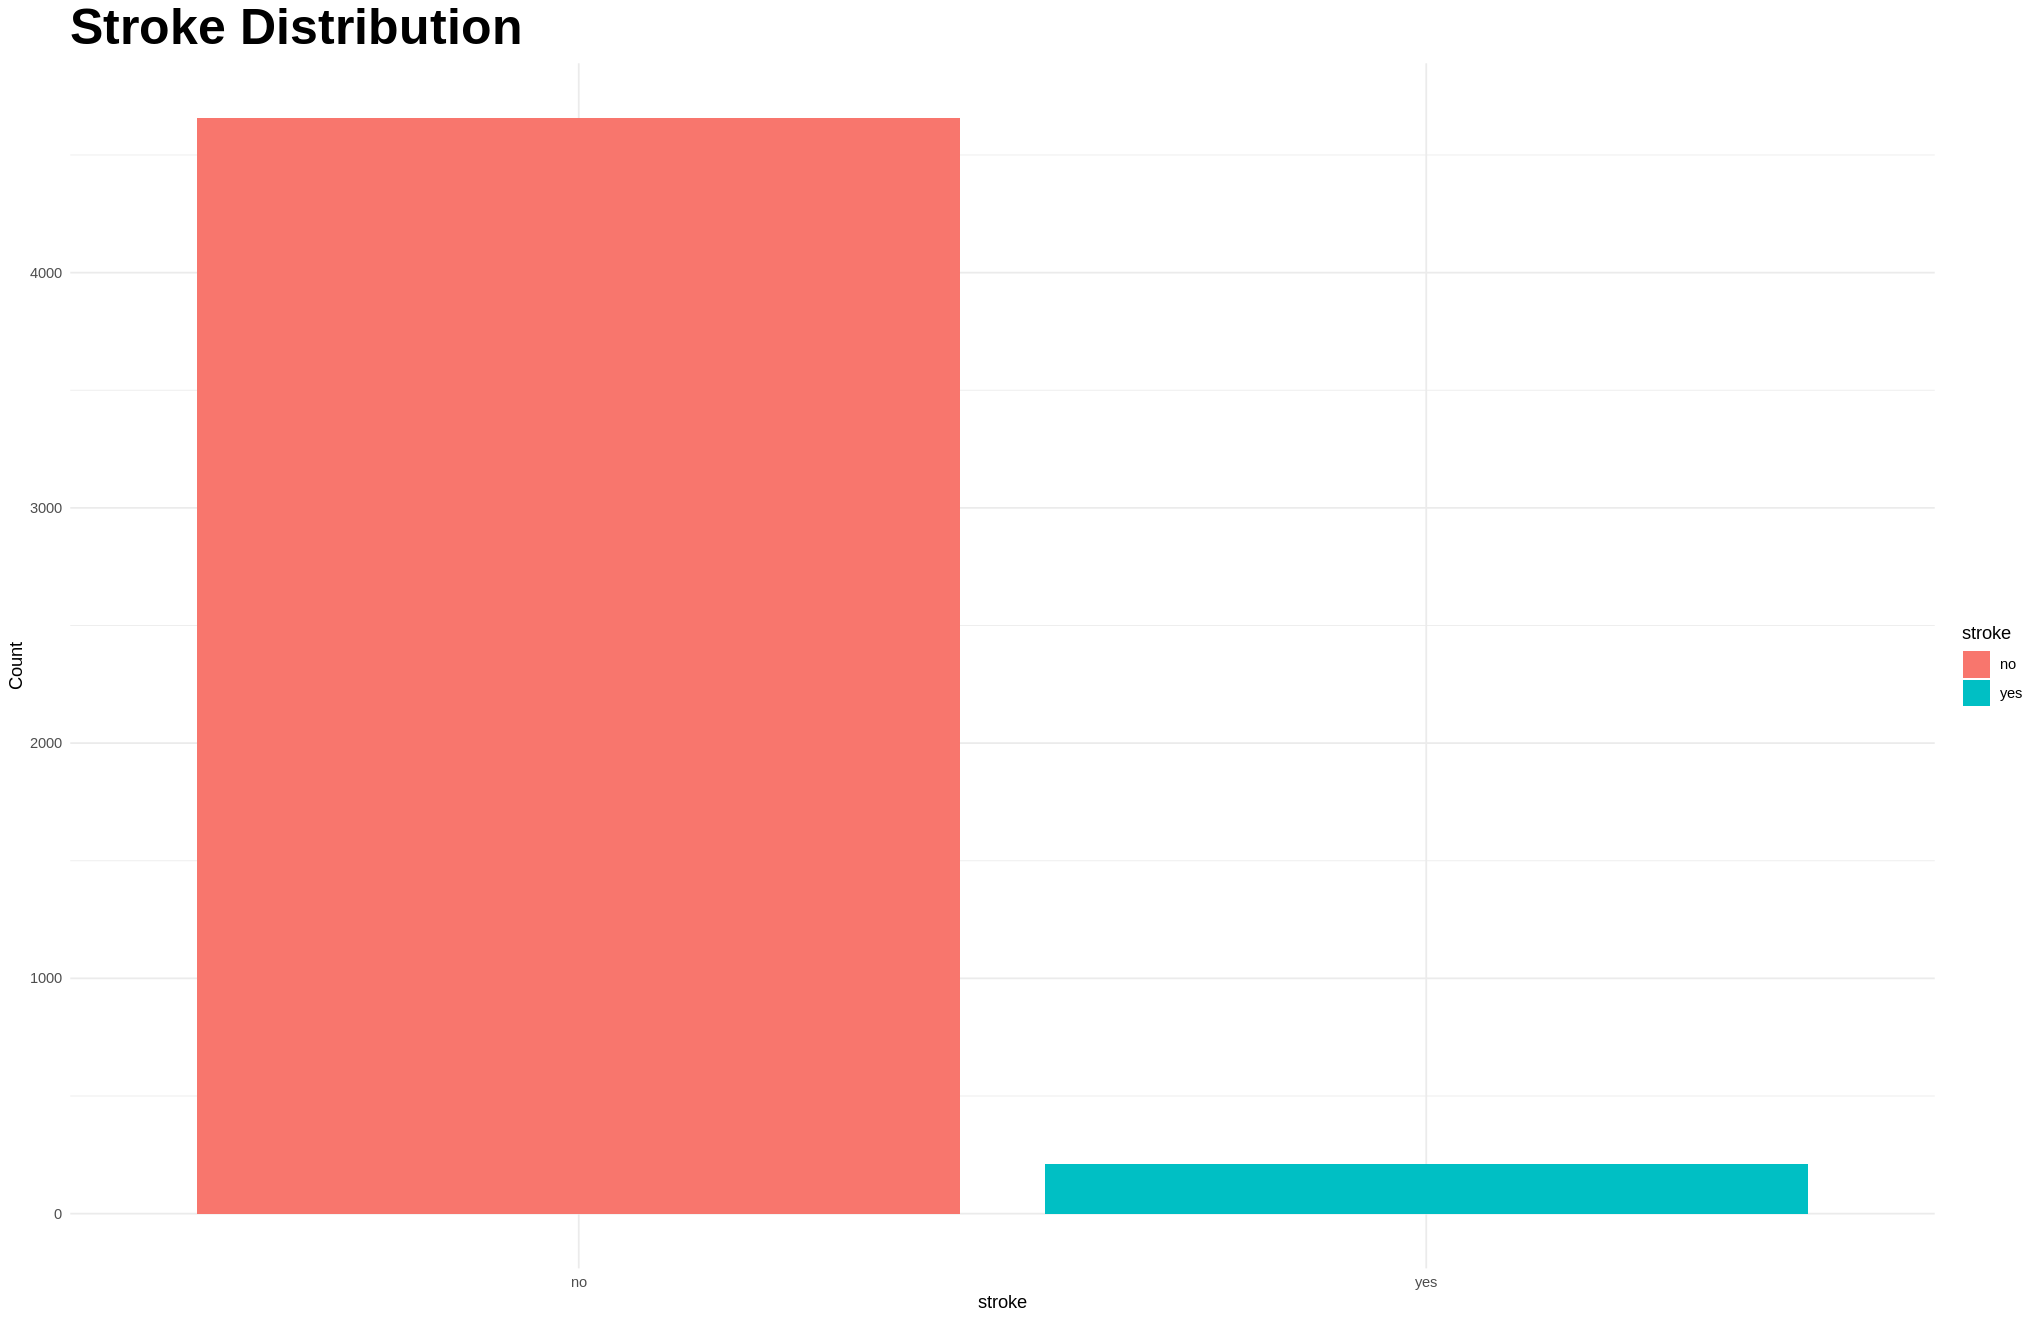

In [ ]:
Stroke_plt <- data_clean %>%
              ggplot() +
              geom_bar(aes(x = stroke, fill = stroke), position = "dodge") +
              theme_minimal() + 
              theme(plot.title = element_text(size = 30, face = "bold")) +
              labs(y = "Count", title = "Stroke Distribution")
Stroke_plt

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 532 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 532 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 532 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



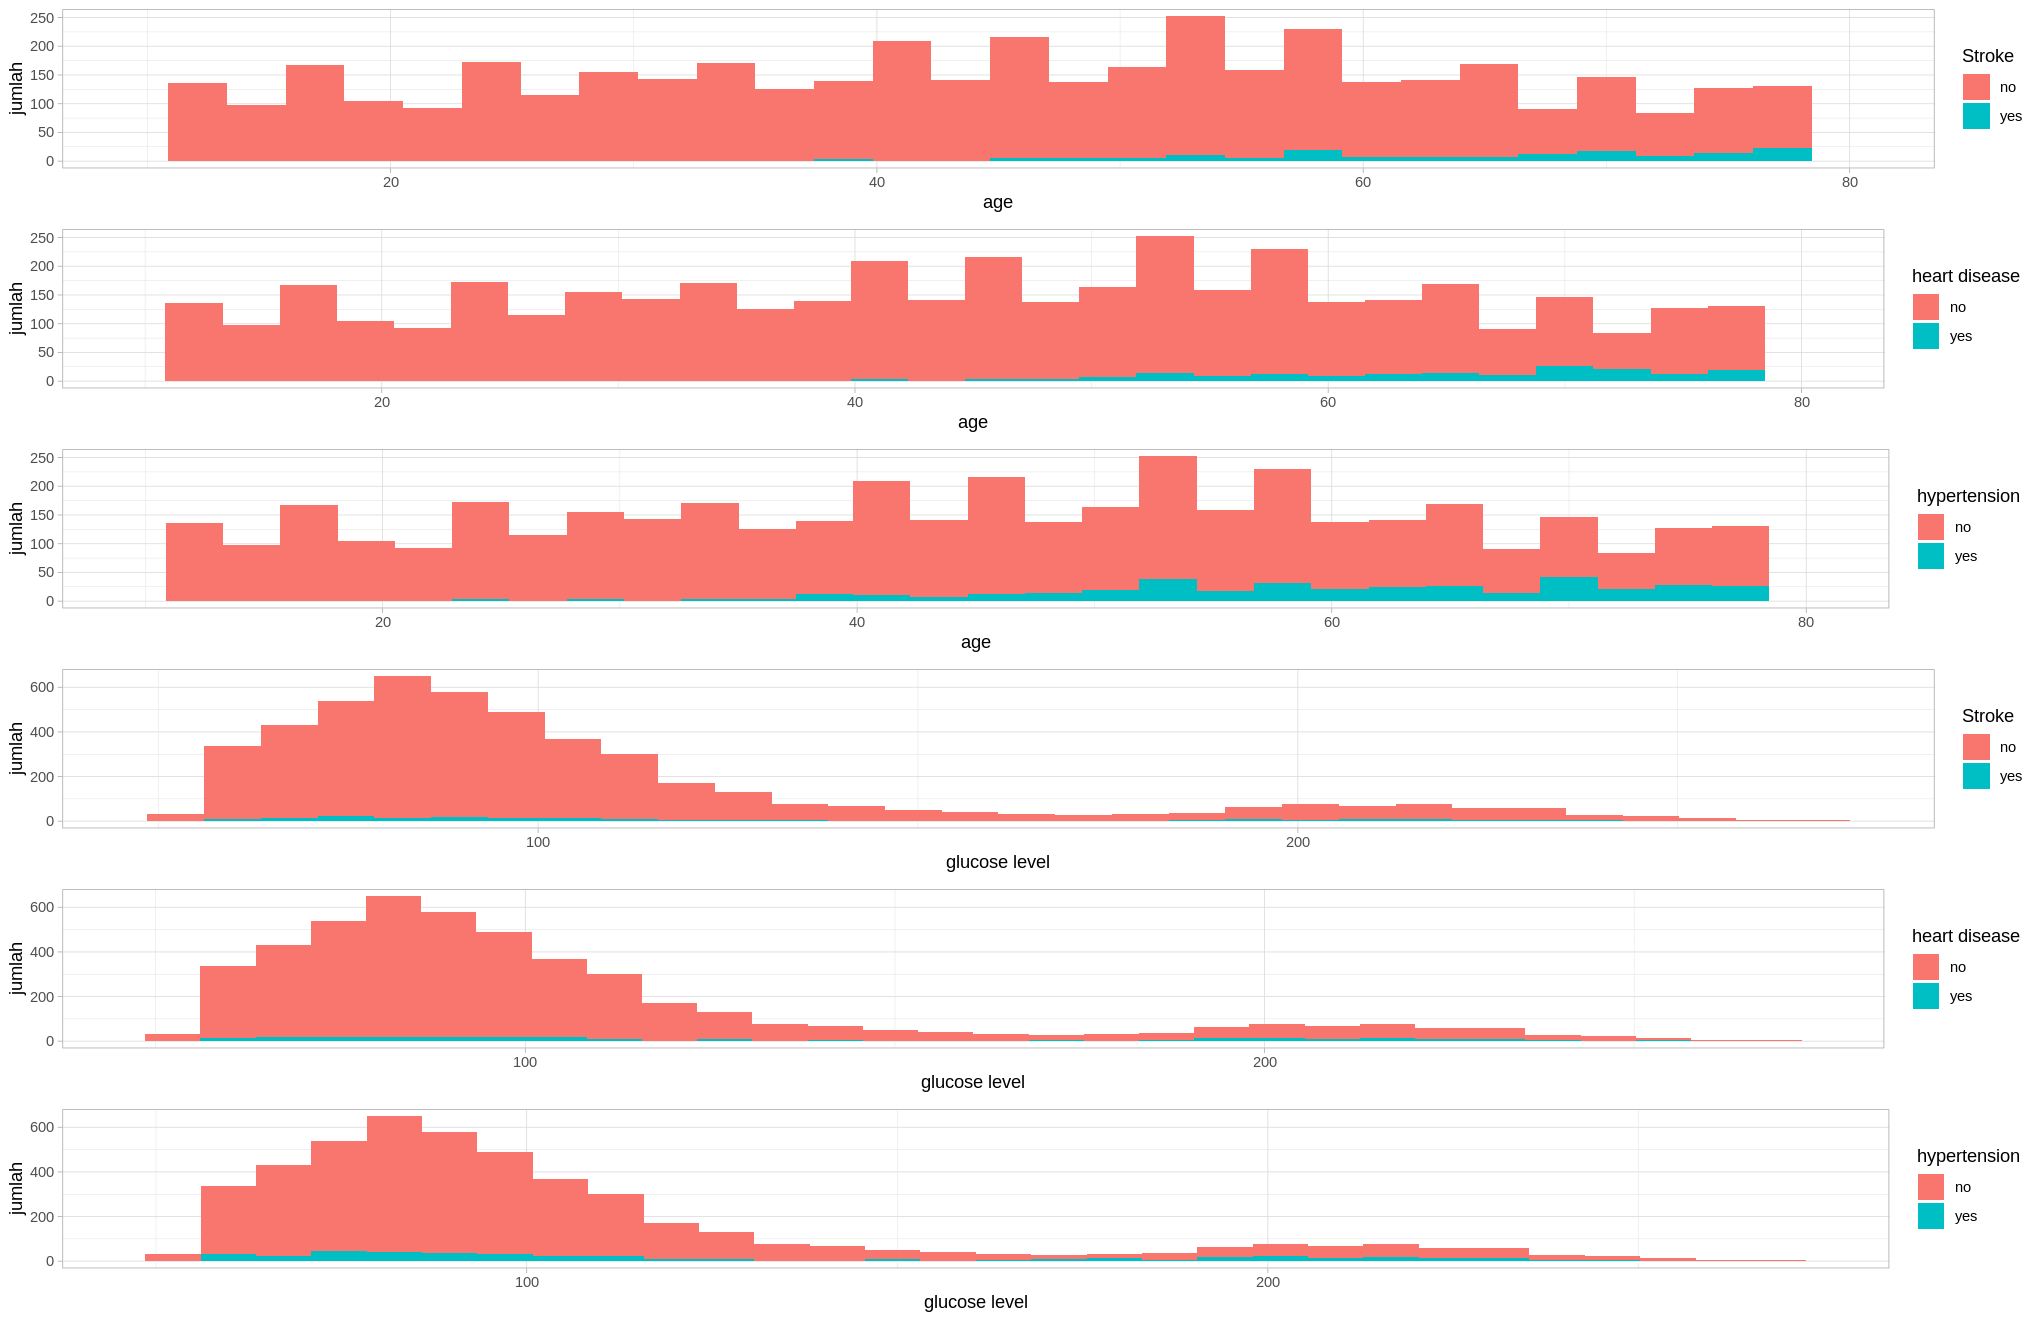

In [ ]:
# membuat histogram dari banyaknya atribut age
g1 <- ggplot(data_clean, aes(x = age,fill = stroke))+ 
  geom_histogram(binwidth =) +
  theme_light()+
  labs(fill = "Stroke")+
  xlim(10,80) +
  ylab("jumlah")
g2 <- ggplot(data_clean, aes(x = age,fill = heart_disease))+ 
  geom_histogram(binwidth =) +
  theme_light()+
  labs(fill = "heart disease")+
  xlim(10,80) +
  ylab("jumlah")
g3 <- ggplot(data_clean, aes(x = age,fill = hypertension))+ 
  geom_histogram(binwidth =) +
  theme_light()+
  labs(fill = "hypertension")+
  xlim(10,80) +
  ylab("jumlah")

# membuat plain histogram dari banyaknya atribut avg_glucose_level
g4 <- ggplot(data_clean, aes(x = avg_glucose_level, fill = stroke)) + geom_histogram()+
  labs(x = "glucose level")+
  labs(fill = "Stroke")+
  ylab("jumlah")+
  theme_light()

g5 <-ggplot(data_clean, aes(x = avg_glucose_level, fill = heart_disease)) + geom_histogram()+
  labs(x = "glucose level")+
  labs(fill = "heart disease")+
  ylab("jumlah")+
  theme_light()

g6 <-ggplot(data_clean, aes(x = avg_glucose_level, fill = hypertension)) + geom_histogram()+
  labs(x = "glucose level")+
  labs(fill = "hypertension")+
  ylab("jumlah")+
  theme_light()

gridExtra::grid.arrange(g1, g2,g3,g4,g5,g6,nrow = 6)

Dari data histogram di atas dapat dianalisis bahwa struk, serangan jantung, dan hipertensi lebih sering terjadi kepada orang dengan usia lanjut.

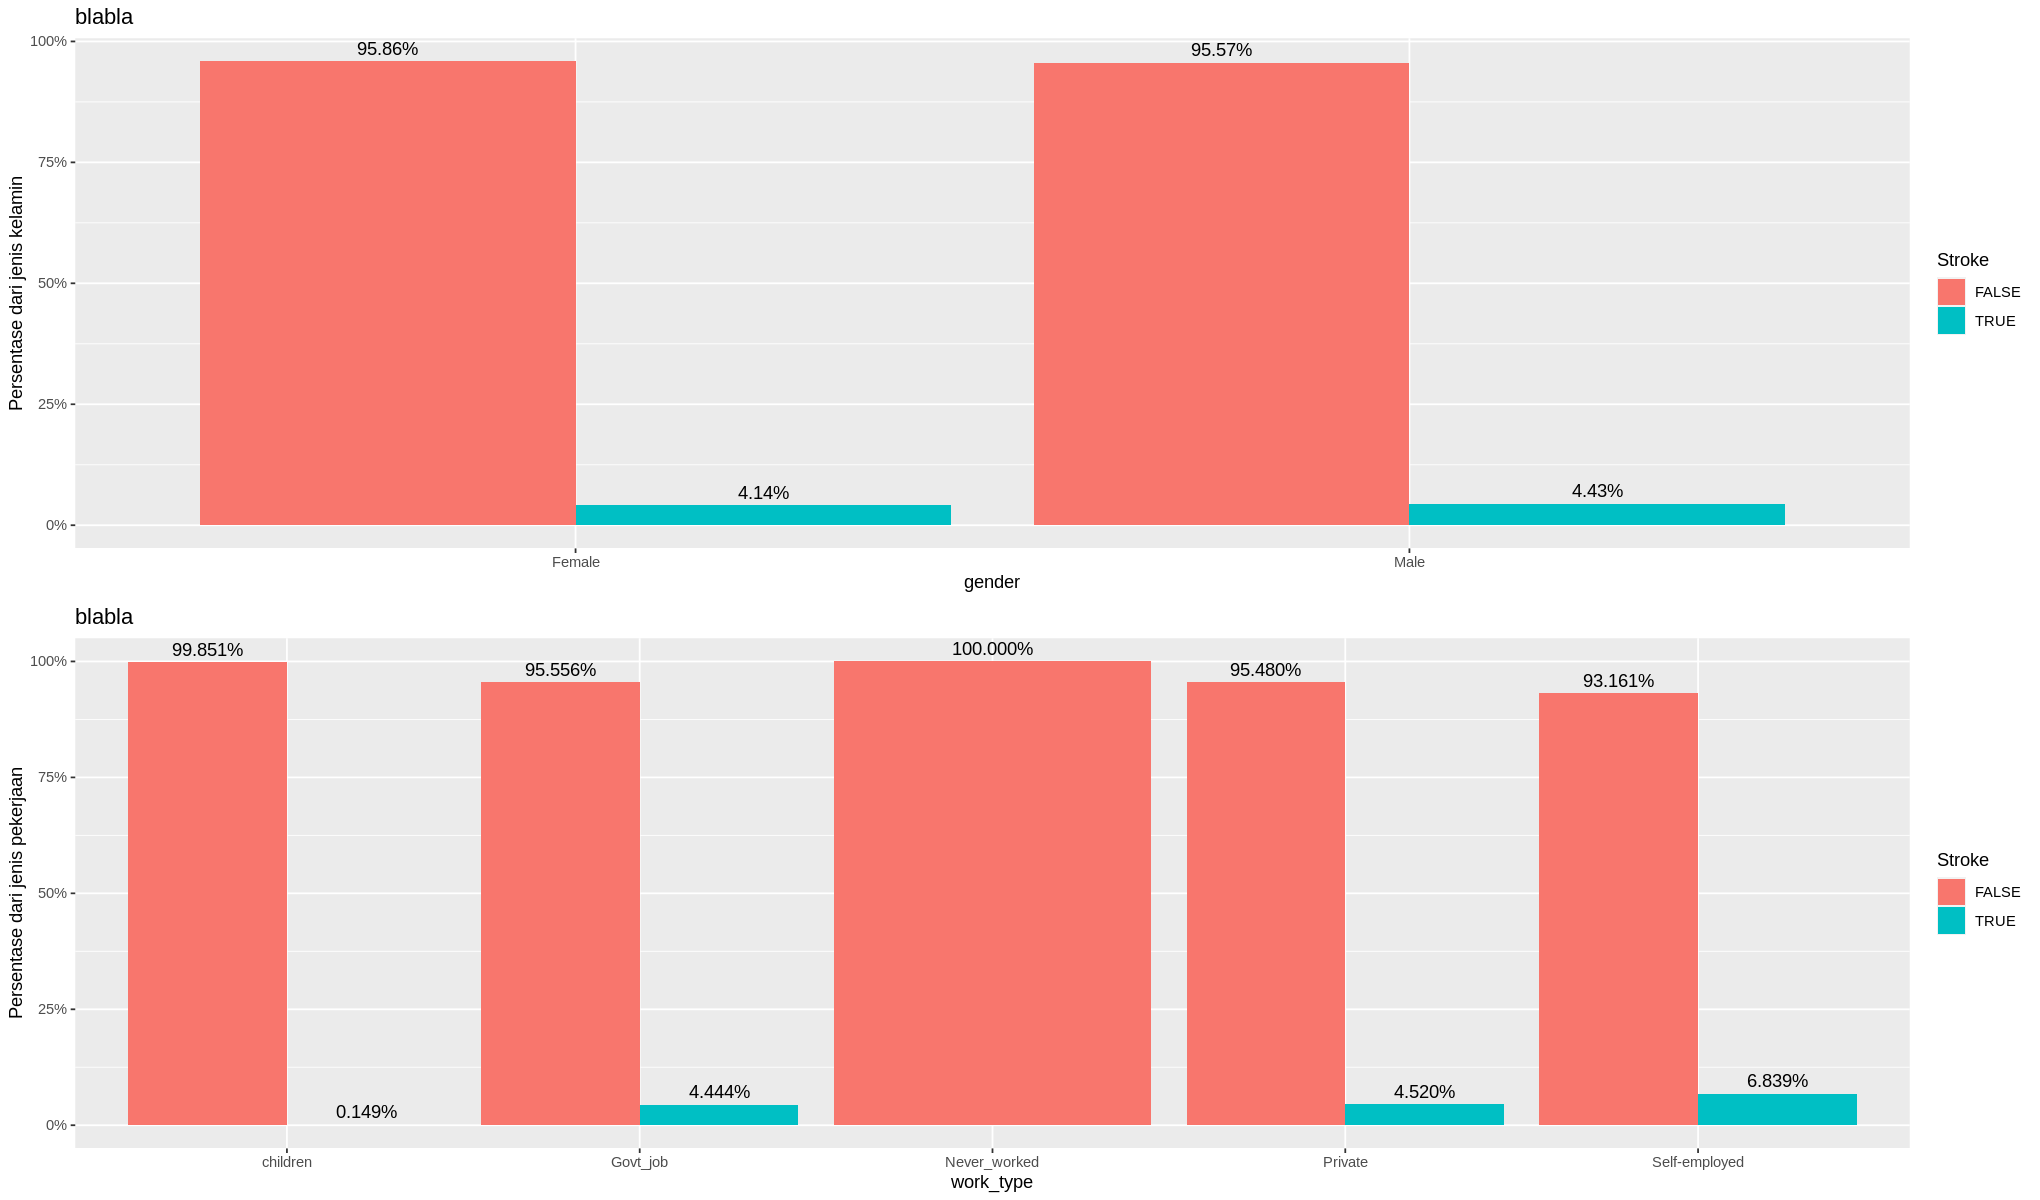

In [ ]:
a1 <- ggplot(data_clean, aes(x=gender, fill=as.factor(stroke == TRUE)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Persentase dari jenis kelamin') +
  scale_y_continuous(labels = scales::percent)+
  labs(title = "blabla",fill = "Stroke")

a2 <- ggplot(data_clean, aes(x=work_type, fill=as.factor(stroke == TRUE)))+
  geom_bar(aes(y=..count../tapply(..count.., ..x.., sum)[..x..]), position = "dodge")+
  geom_text(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..], label=scales::percent(..count../tapply(..count.., ..x.. ,sum)[..x..]) ), stat="count", position=position_dodge(0.9), vjust=-0.5)+ylab('Persentase dari jenis pekerjaan') +
  scale_y_continuous(labels = scales::percent)+
  labs(title = "blabla",fill = "Stroke")



  gridExtra::grid.arrange(a1, a2)

Dari presentase data yang terdapat pada histogram di atas dapat dianalisis bahwa:

1.   "Gender" memiliki presentase korelasi yang sangat minim dengan "stroke" sehingga bisa dikatakan "gender" tidak ada hubungannya dengan "stroke".
2.   "work_type" memiliki korelasi dengan "stroke", pekerjaan "Never_worked" memiliki presentase 100% jadi dapat dikatakan "Never_worked" tidak ada hubungannya dengan stroke atau tidak bekerja = tidak memiliki stroke.

#**Korelasi, Uji Koefisien, dan Scatter Plot**

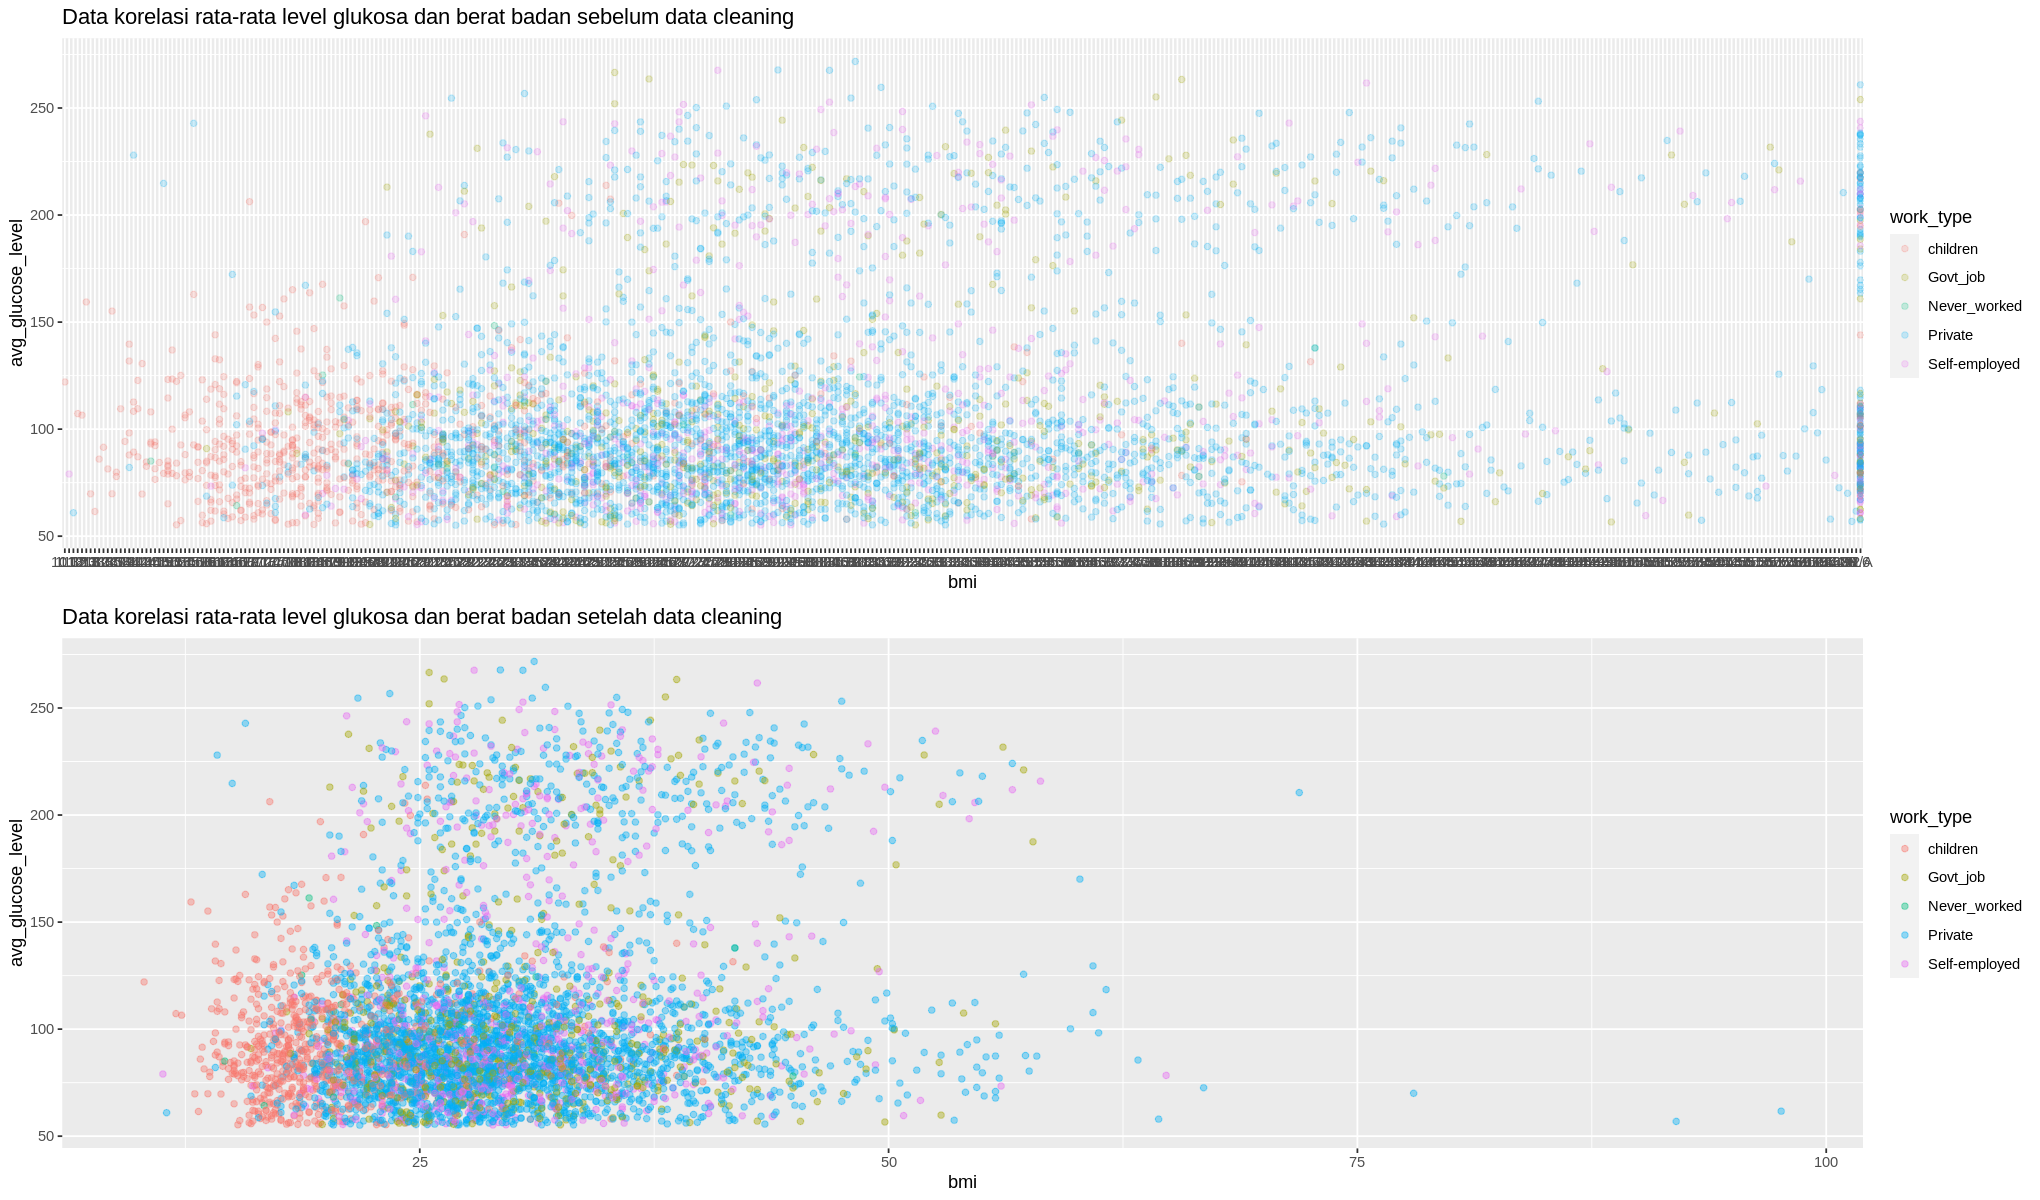

In [ ]:
# membandingkan korelasi data rata-rata glukosa dan data bmi dari yang sudah dibersihkan dan tidak
 # dari variabel data_clean

g1 <- ggplot(data, aes(x = bmi, y = avg_glucose_level,colour = work_type)) + 
  geom_point(alpha = .2) +labs(title = "Data korelasi rata-rata level glukosa dan berat badan sebelum data cleaning")
g2 <- ggplot(data_clean, aes(x = bmi, y = avg_glucose_level,colour = work_type)) + geom_point(alpha = .4)+
  labs(title = "Data korelasi rata-rata level glukosa dan berat badan setelah data cleaning")  
gridExtra::grid.arrange(g1, g2, nrow = 2)

  

Dari perbandingan data scatter plot di atas dapat analisis bahwa setelah dilakukannya data cleaning terhadap "bmi" korelasi antar variabel "bmi", "work_type", dan "avg_glucose_level" semakin kuat.



---


**Uji Koefisien Korelasi**

Uji koefisien korelasi di bawah ini menggunakan data dari scatter plot sebelumnya yang sudah dilakukan data cleaning

In [ ]:
cor.test(data_clean$bmi, data_clean$avg_glucose_level)


	Pearson's product-moment correlation

data:  data_clean$bmi and data_clean$avg_glucose_level
t = 12.499, df = 4906, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1484233 0.2026536
sample estimates:
      cor 
0.1756717 


Dari data di atas dapat dilihat bahwa korelasi dari variabel "bmi" dan "avg_glucose_level" adalah 0.1756717, hal ini menunjukkan keterkaitan antara keduanya yang apabila "bmi" meningkat maka "avg_glucose_level" juga ikut meningkat.


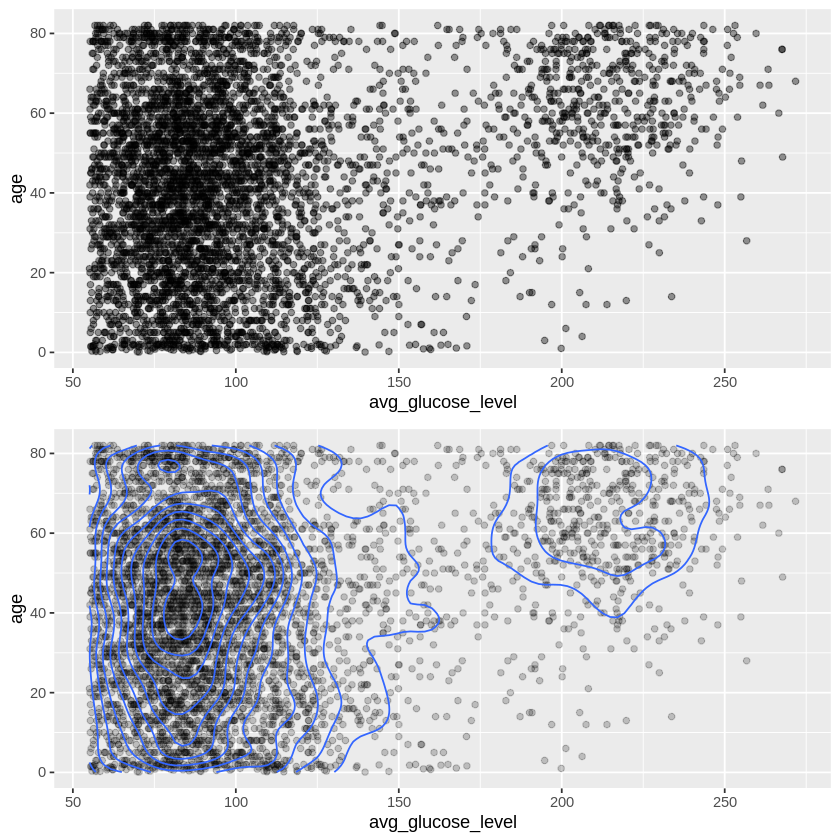

In [ ]:
g1 <- ggplot(data, aes(x = avg_glucose_level, y = age)) + geom_point(alpha = .4)
g2 <- ggplot(data, aes(x = avg_glucose_level, y = age)) + 
  geom_point(alpha = .2) + 
  geom_density2d()
gridExtra::grid.arrange(g1, g2, nrow = 2)

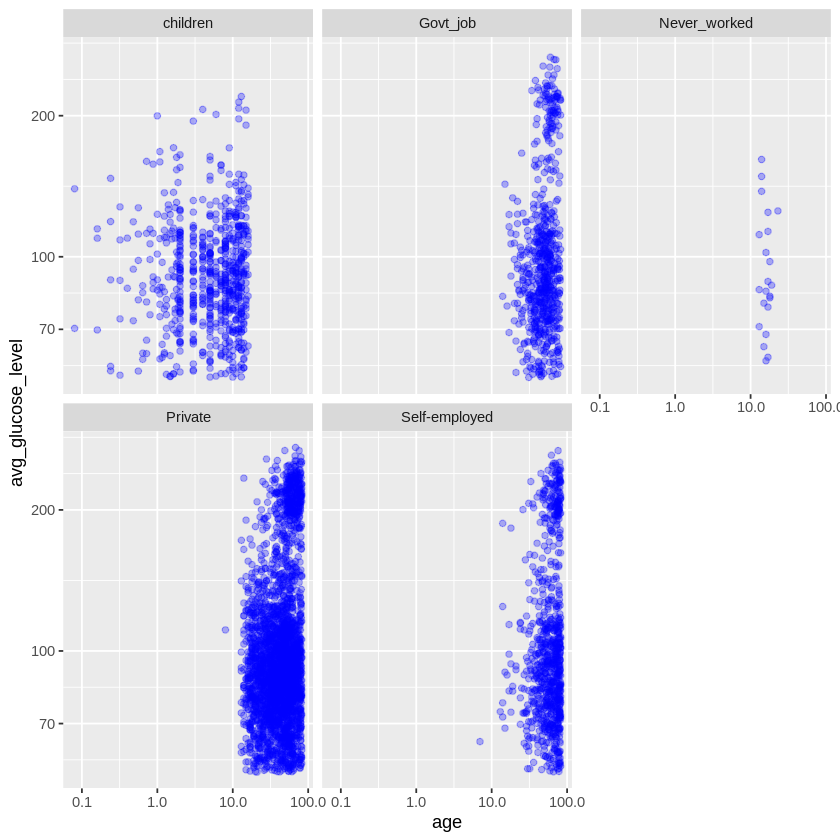

In [ ]:
ggplot(data, aes(x = age, y = avg_glucose_level)) +
  geom_point(alpha = .3, color="blue") +
  scale_x_log10() +
  scale_y_log10() +
  facet_wrap(~ work_type, nrow = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



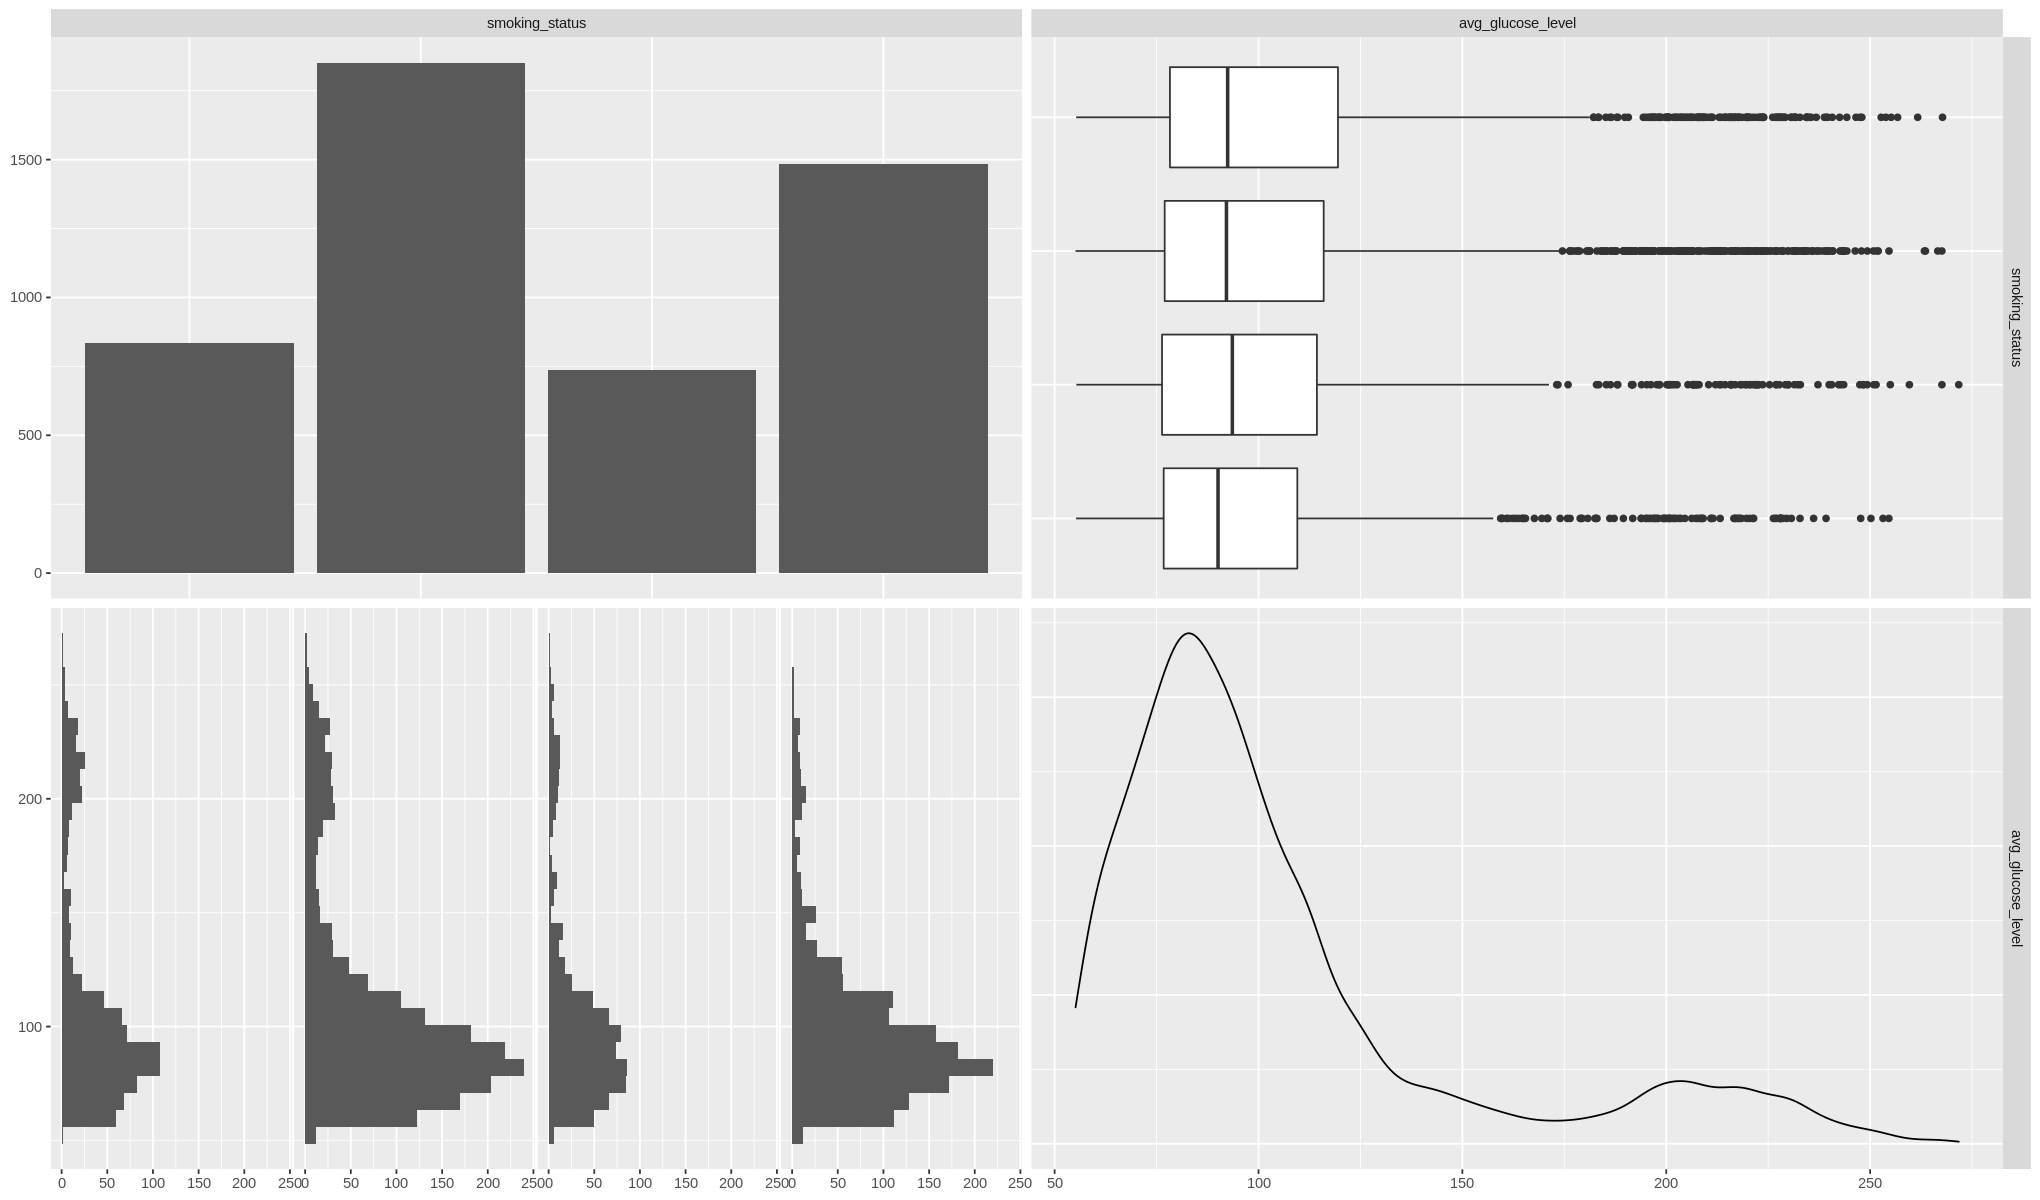

In [ ]:
#Menampilkan keterhubungan antara gender dengan heart_disease
data_clean %>%
  select(smoking_status, avg_glucose_level) %>%
  ggpairs()

#**Plot**

**Boxplot**

Warning message:
“Duplicated aesthetics after name standardisation: fill”


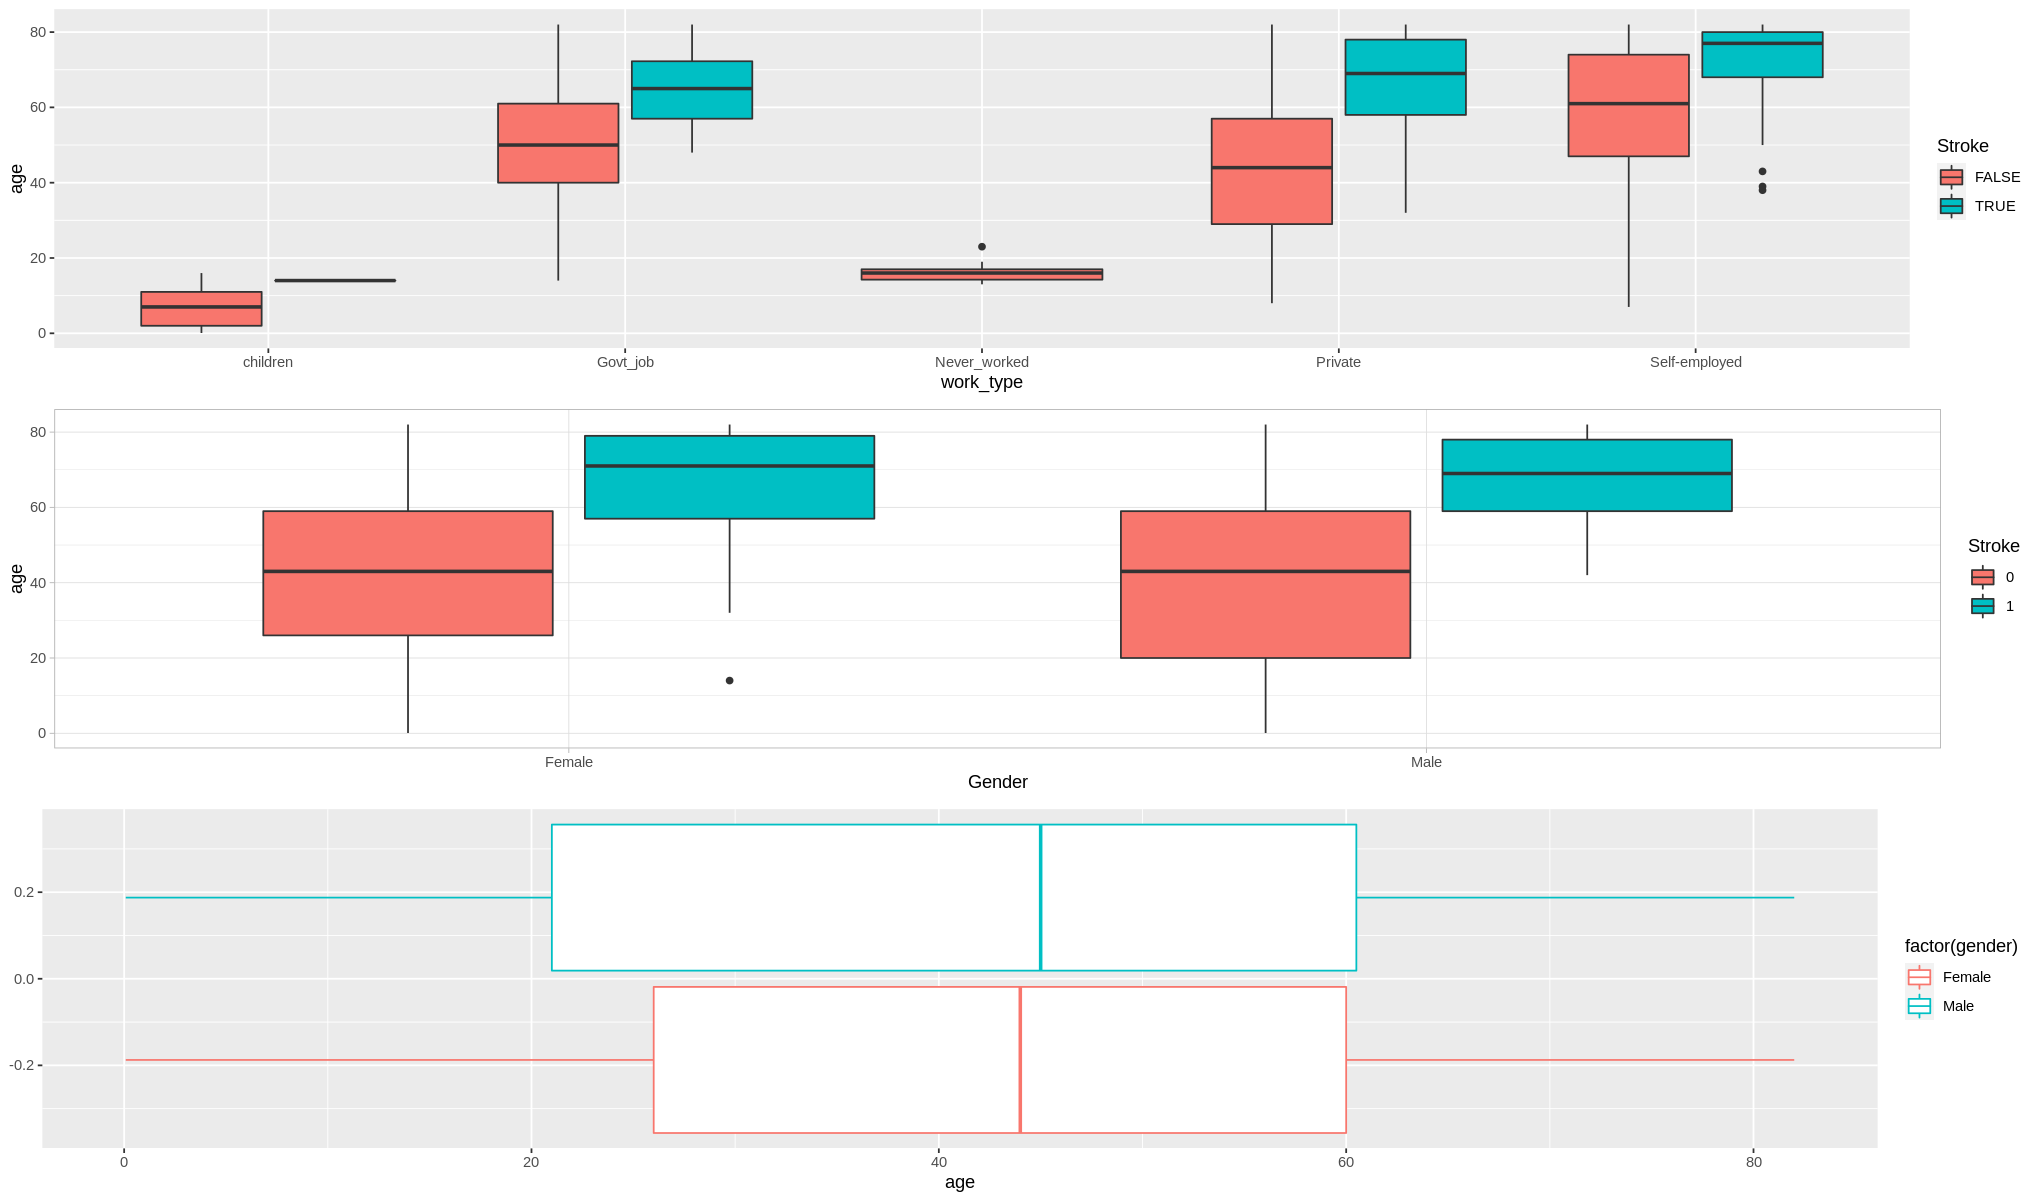

In [ ]:
g1 <-ggplot(data_clean, aes(x = work_type, y = age
  ,fill = stroke==1 ,fill= "Stroke"))+geom_boxplot()+labs(fill = "Stroke")
g2 <- ggplot(data_clean, aes(x = factor(gender),fill = factor(stroke), y = age))+ 
  geom_boxplot() +
  theme_light()+
  labs(fill = "Stroke", x = "Gender")
g3 <- ggplot(data_clean, aes(x = age, color = factor(gender))) +
  geom_boxplot()
gridExtra::grid.arrange(g1, g2, g3, ncol=1, nrow = 3)

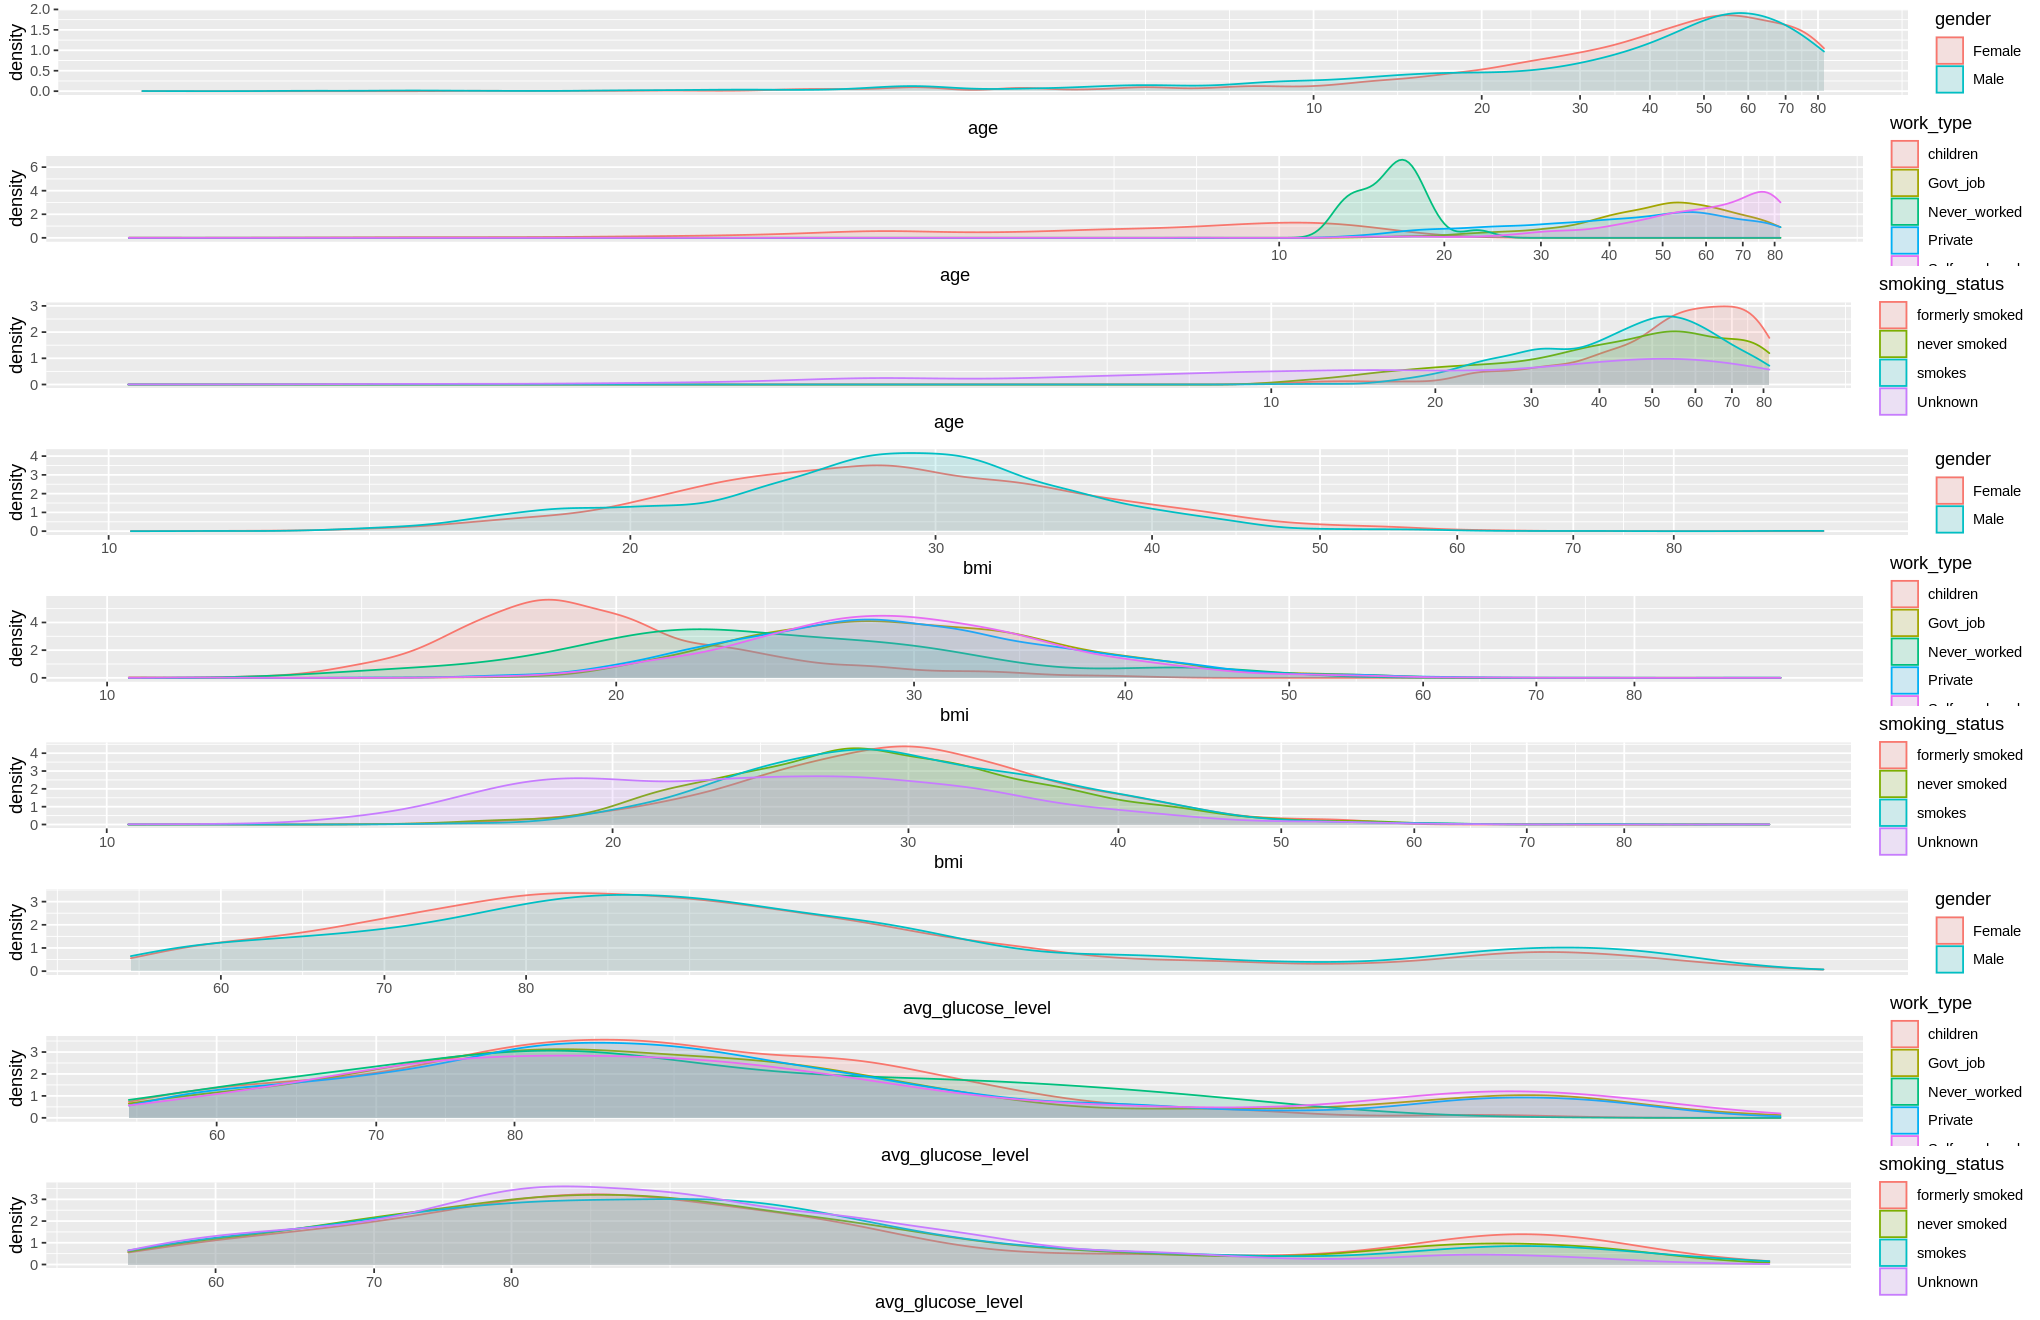

In [ ]:
g1 <- ggplot(data_clean, aes(x = age, color = gender, fill = gender)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10)
g2 <- ggplot(data_clean, aes(x = age, color = work_type, fill = work_type)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)
g3 <- ggplot(data_clean, aes(x = age, color = smoking_status, fill = smoking_status)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)

g4 <- ggplot(data_clean, aes(x = bmi, color = gender, fill = gender)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10)
g5 <- ggplot(data_clean, aes(x = bmi, color = work_type, fill = work_type)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)
g6 <- ggplot(data_clean, aes(x = bmi, color = smoking_status, fill = smoking_status)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)

g7 <- ggplot(data_clean, aes(x = avg_glucose_level, color = gender, fill = gender)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10)
g8 <- ggplot(data_clean, aes(x = avg_glucose_level, color = work_type, fill = work_type)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)
g9 <- ggplot(data_clean, aes(x = avg_glucose_level, color = smoking_status, fill = smoking_status)) +
  geom_density(alpha = .15) +
  scale_x_log10(breaks = c(1,2,3,4,5,6,7,8) * 10,labels = scales::number)
gridExtra::grid.arrange(g1, g2,g3,g4,g5,g6,g7,g8,g9,nrow=9)

#**Diagram Garis dan Lingkaran**

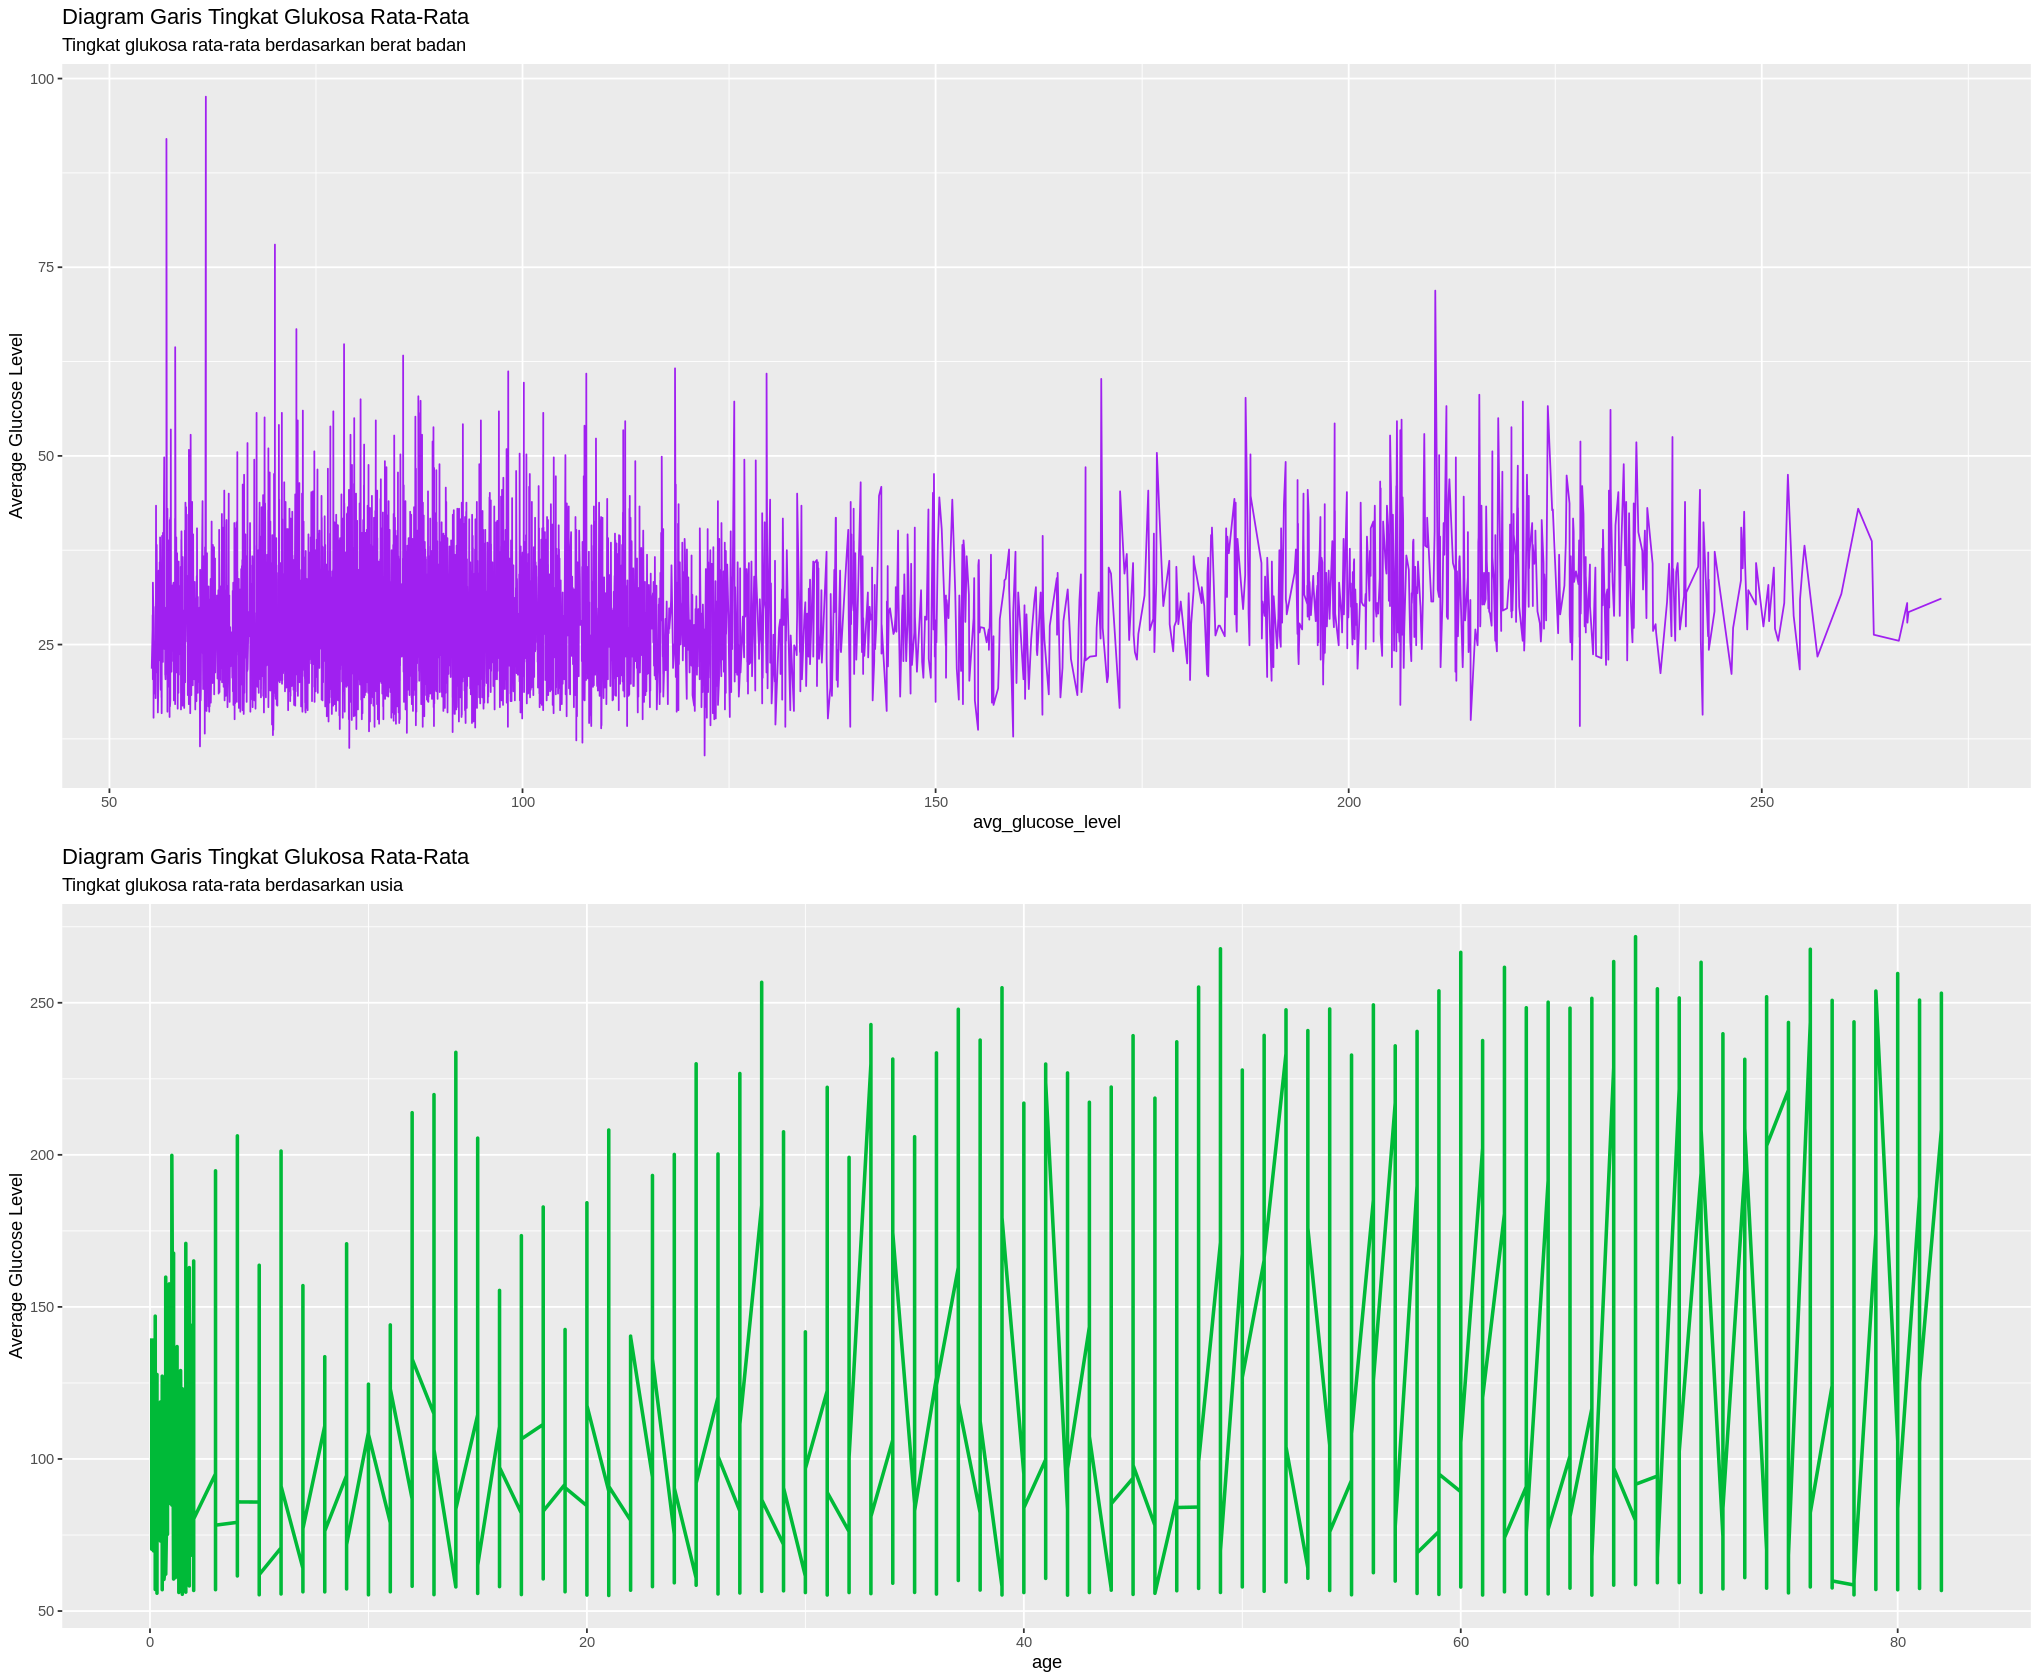

In [ ]:
lineChart <- ggplot(data_clean, aes(x= avg_glucose_level, y = bmi)) + geom_line(color = "purple")+
  labs(title = "Diagram Garis Tingkat Glukosa Rata-Rata ", subtitle="Tingkat glukosa rata-rata berdasarkan berat badan",
      , y = "Average Glucose Level")
lineChart1 <- ggplot(data, aes(x = age)) +
  geom_line(aes(y = avg_glucose_level), color = "#00ba38", size=1) +
  labs(title = "Diagram Garis Tingkat Glukosa Rata-Rata ", subtitle="Tingkat glukosa rata-rata berdasarkan usia",
      , y = "Average Glucose Level")
gridExtra::grid.arrange(lineChart,lineChart1,nrow = 2)


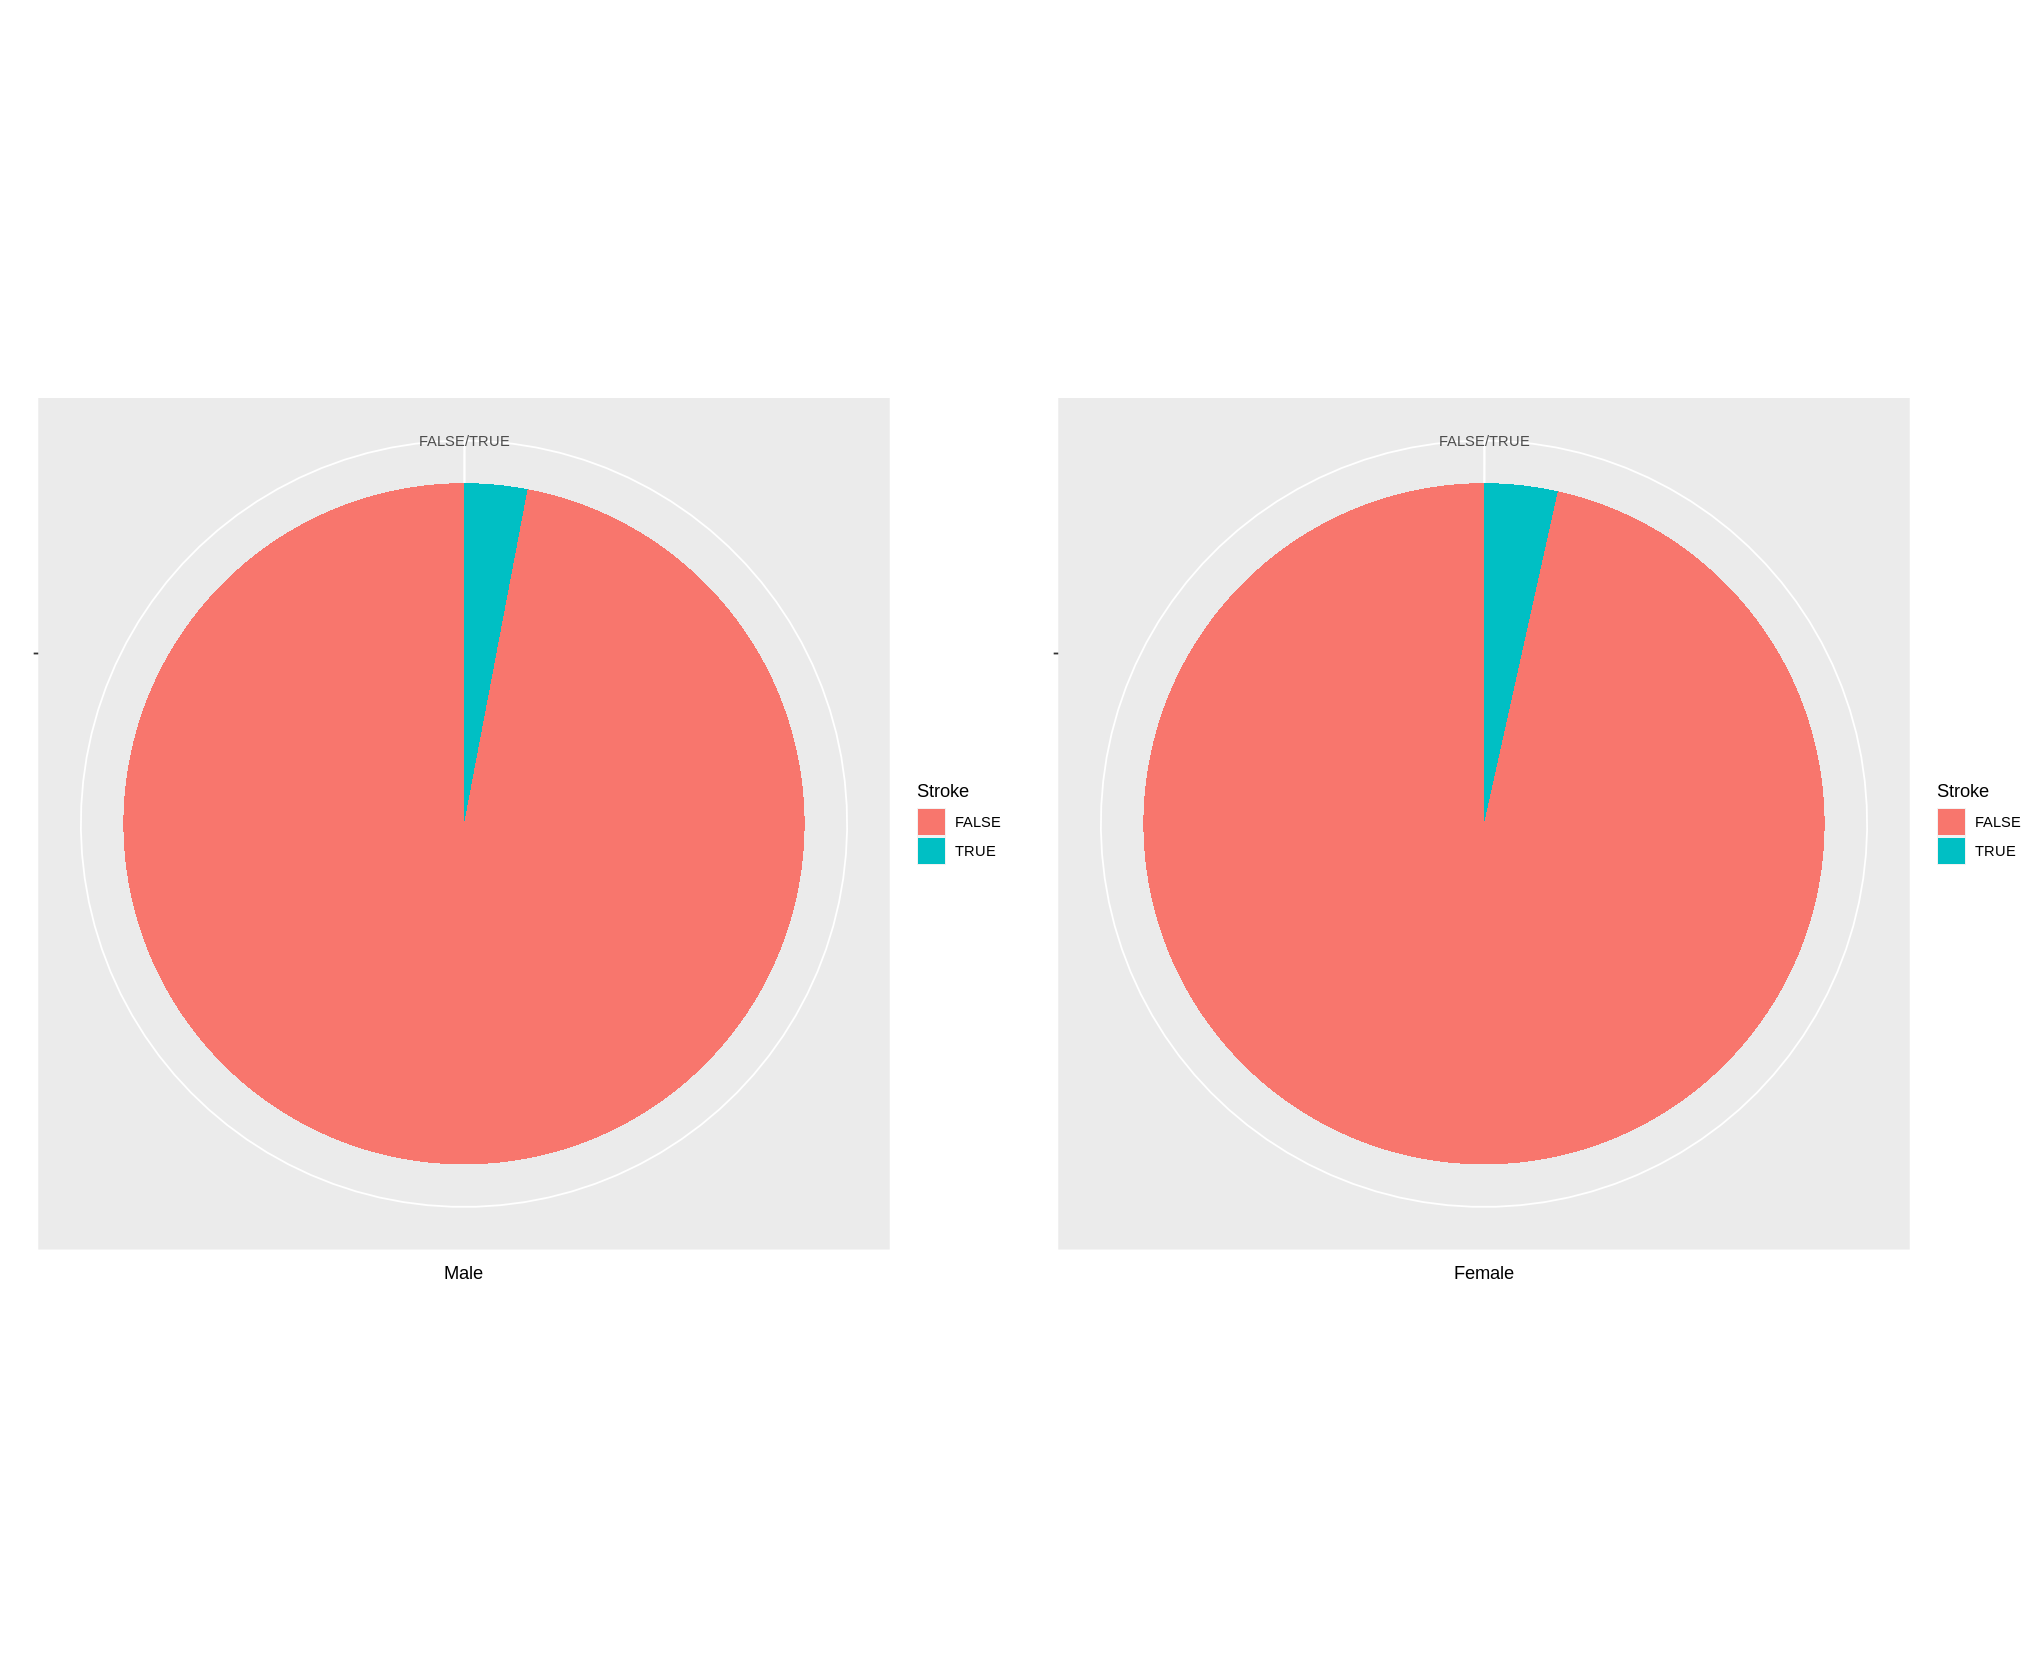

In [ ]:
g1 <- ggplot(data, aes(x = "", y = gender == "Male", fill = factor(stroke & gender == "Male"))) +
  geom_col() +
  coord_polar(theta = "y")+
  labs(fill="Stroke", y = "Male", x = "")
g2 <- ggplot(data, aes(x = "", y = gender == "Female", fill = factor(stroke & gender == "Female"))) +
  geom_col() +
  coord_polar(theta = "y")+
  labs(fill="Stroke", y = "Female", x = "")
gridExtra::grid.arrange(g1, g2, ncol = 2)

#**Heatmap**

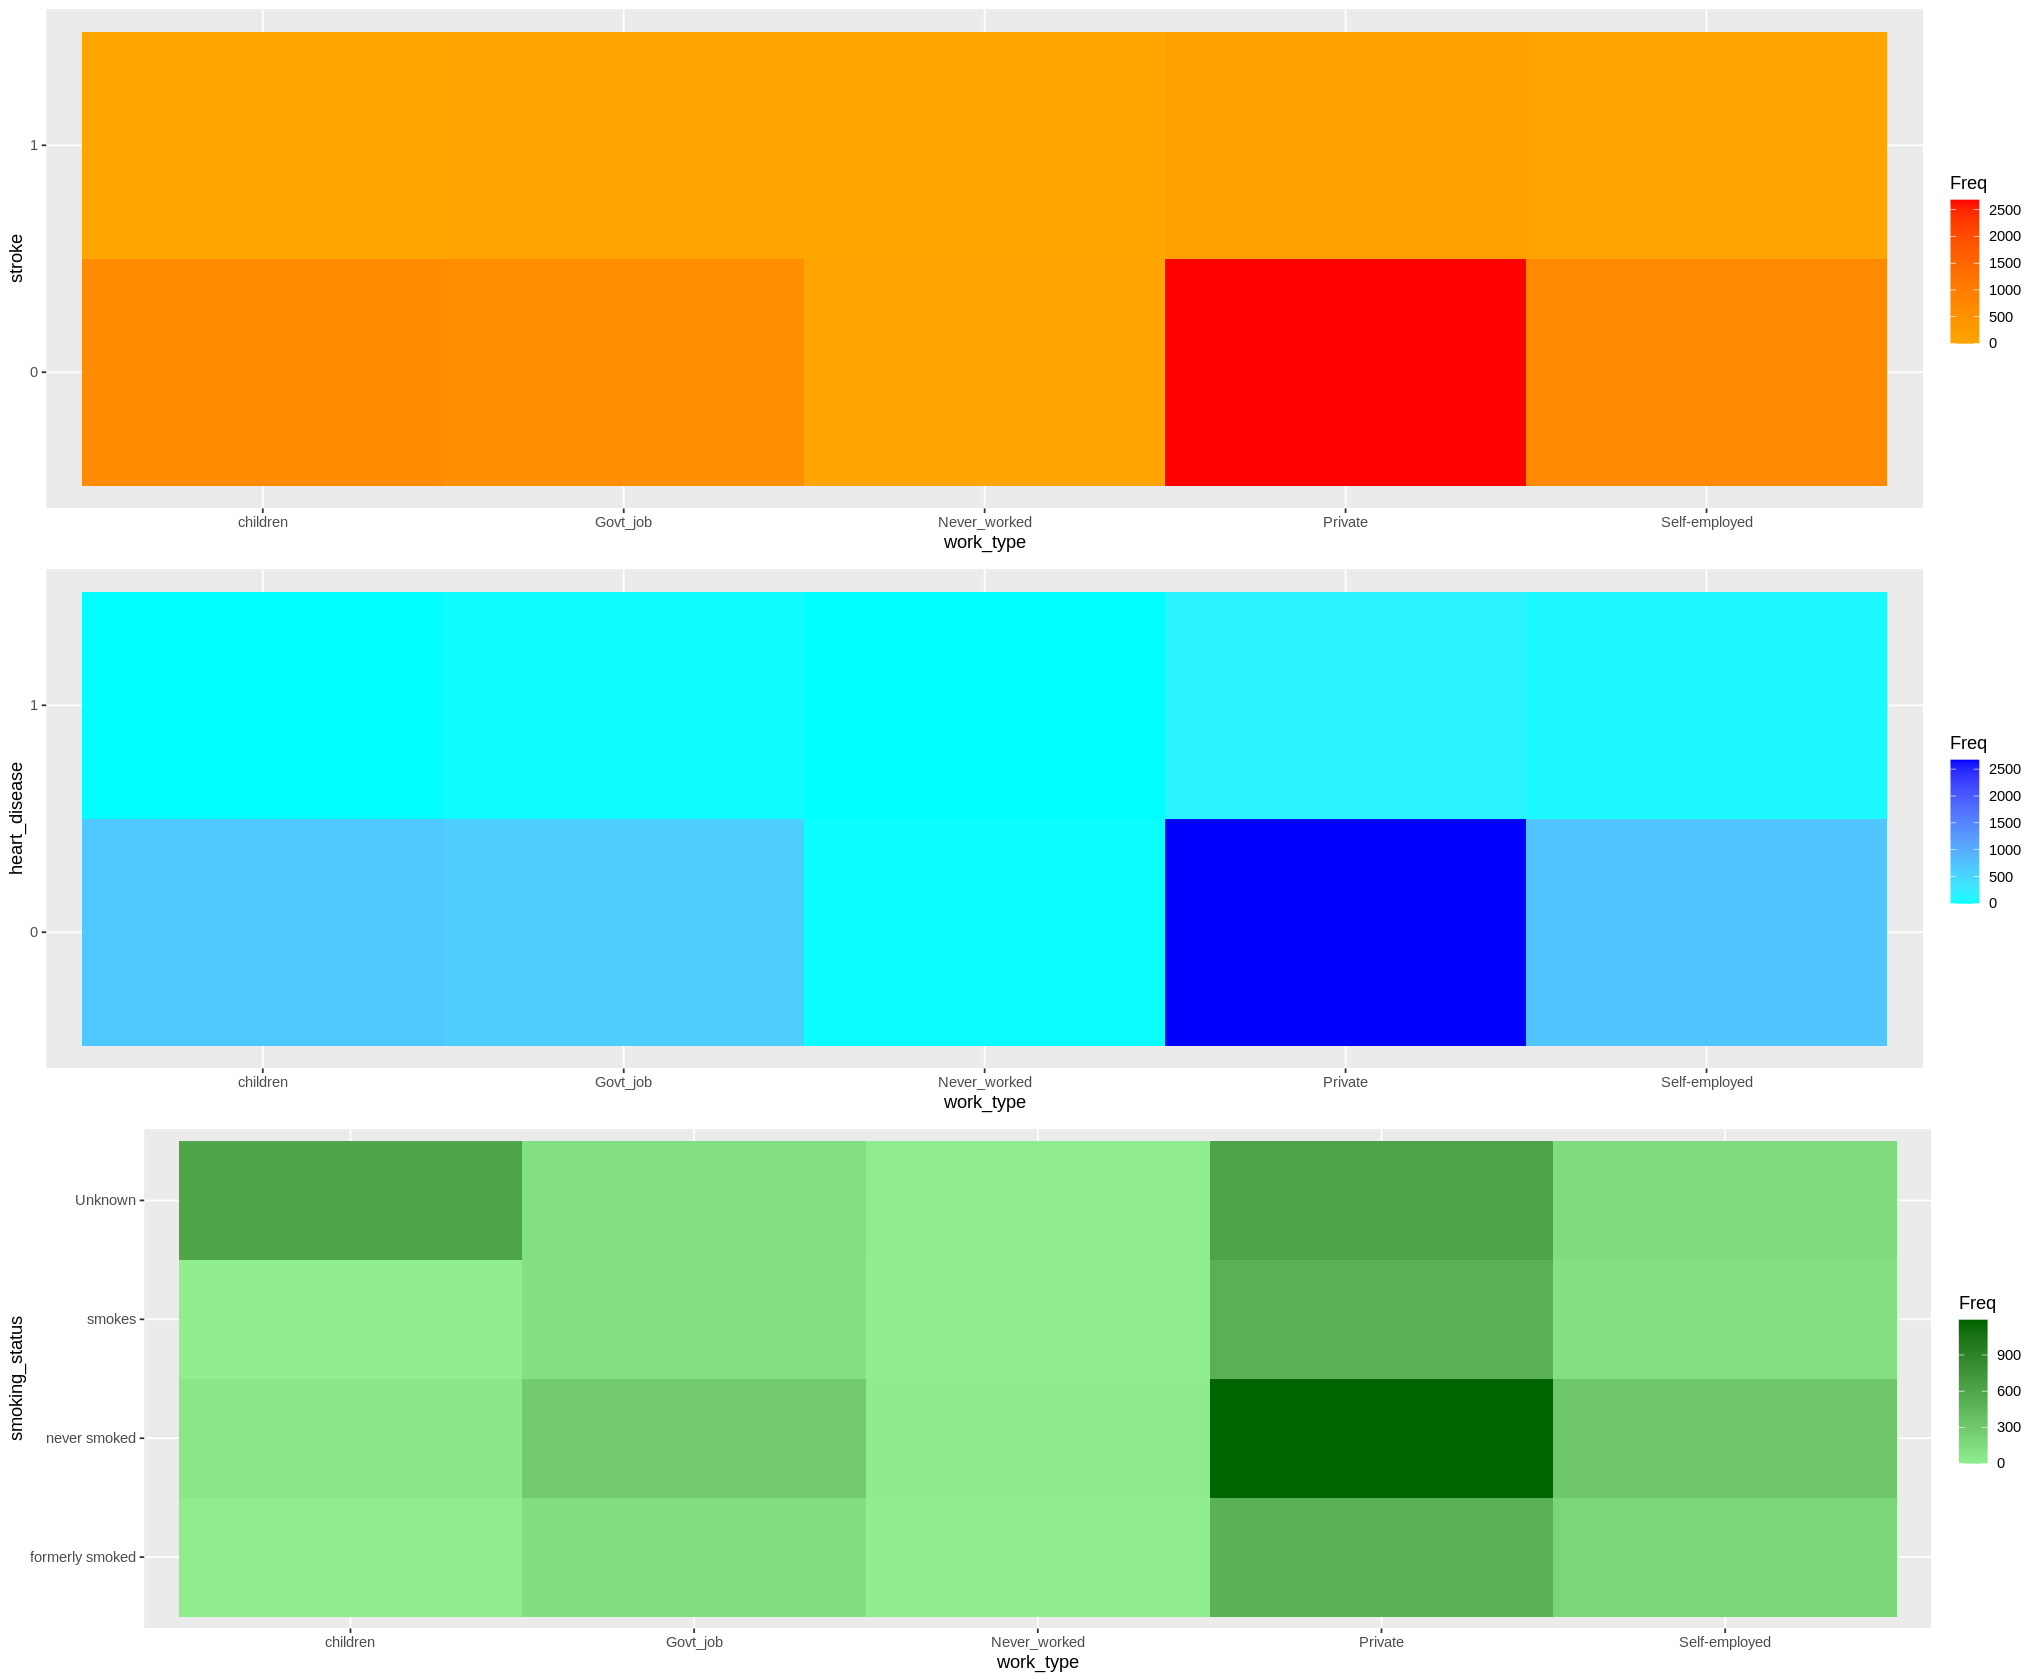

In [ ]:
a = select(data_clean, stroke, work_type)
with_freq1 = as.data.frame(table(a))

b = select(data_clean, heart_disease, work_type)
with_freq2 = as.data.frame(table(b))

c = select(data_clean, smoking_status, work_type)
with_freq3 = as.data.frame(table(c))

plot1<-ggplot(with_freq1, aes(work_type, stroke, fill= Freq)) + 
 geom_tile()+scale_fill_gradient(low="orange",high="red")

plot2<-ggplot(with_freq2, aes(work_type, heart_disease, fill= Freq)) + 
 geom_tile()+scale_fill_gradient(low="cyan",high="blue")

plot3<-ggplot(with_freq3, aes(work_type, smoking_status, fill= Freq)) + 
 geom_tile()+scale_fill_gradient(low="light green",high="dark green")

gridExtra::grid.arrange(plot1, plot2, plot3 , nrow = 3)

# **Balloon Plot**


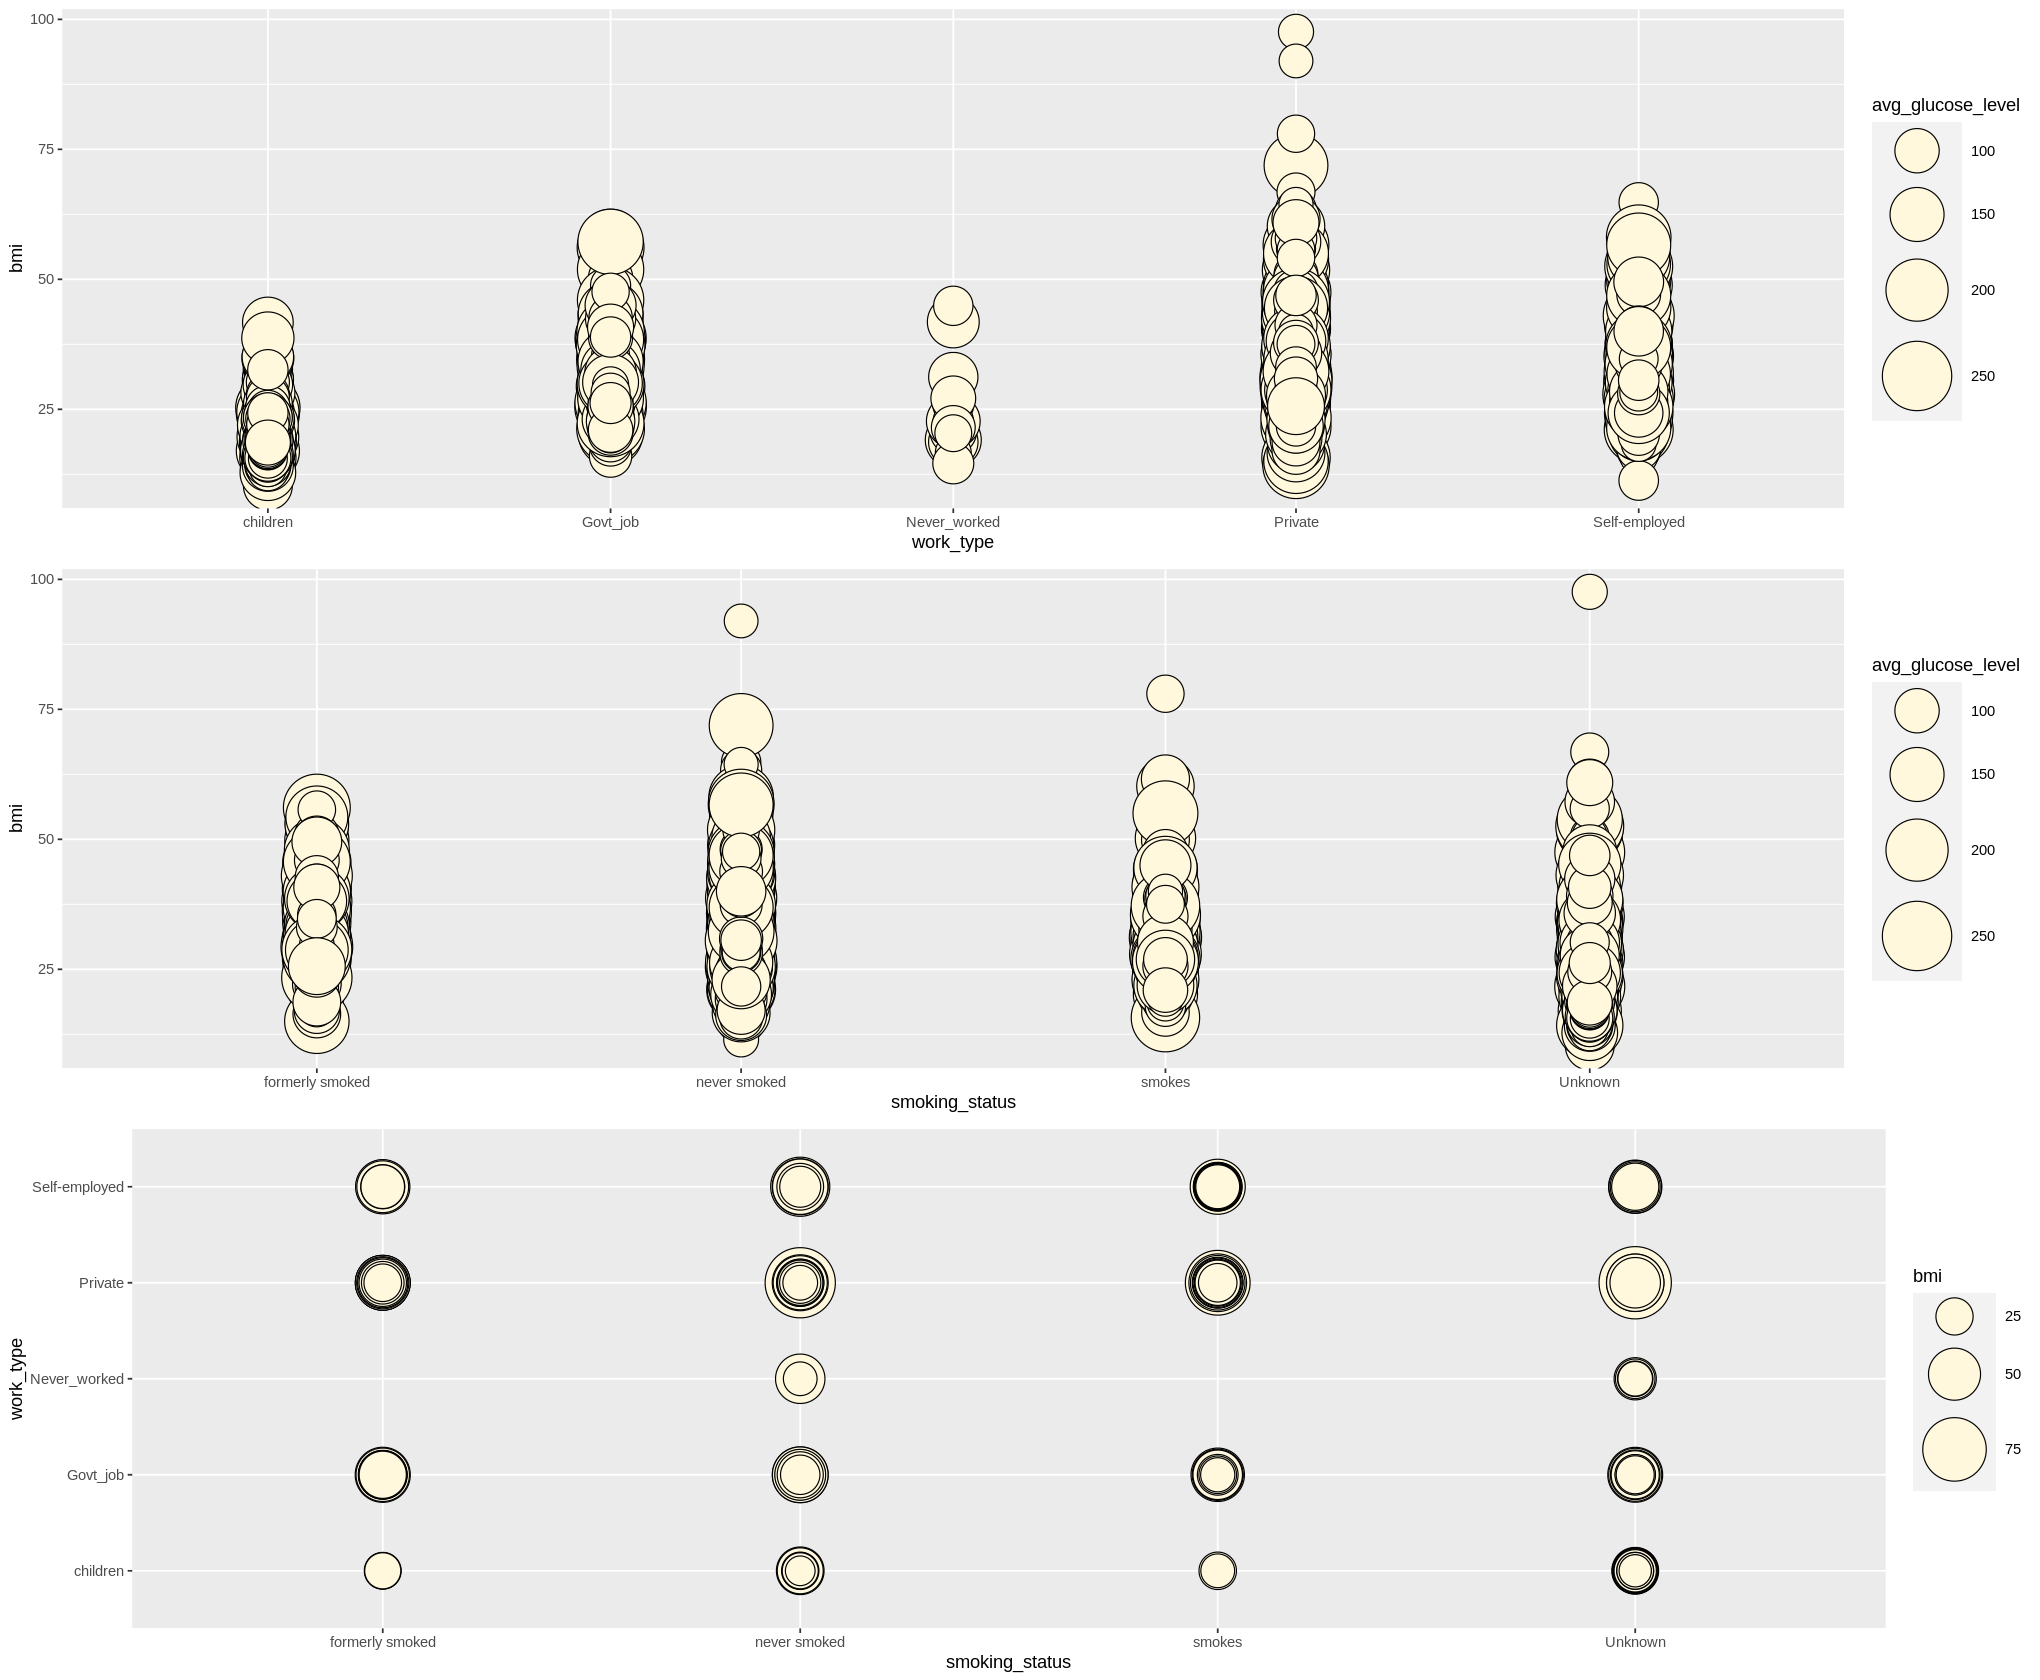

In [ ]:
cdat_sp <- ggplot(data_clean, aes(x = work_type, y = bmi, size = avg_glucose_level)) +
    geom_point(shape = 21, colour = "black", fill = "cornsilk")+ scale_size_area(max_size = 20)
cdat_sp2 <- ggplot(data_clean, aes(x = smoking_status, y = bmi, size = avg_glucose_level)) +
    geom_point(shape = 21, colour = "black", fill = "cornsilk")+ scale_size_area(max_size = 20)
cdat_sp3 <- ggplot(data_clean, aes(x = smoking_status, y = work_type, size = bmi)) +
    geom_point(shape = 21, colour = "black", fill = "cornsilk")+ scale_size_area(max_size = 20)
    
gridExtra::grid.arrange(cdat_sp, cdat_sp2, cdat_sp3 , nrow = 3)

# **Grafik Matriks Korelasi**

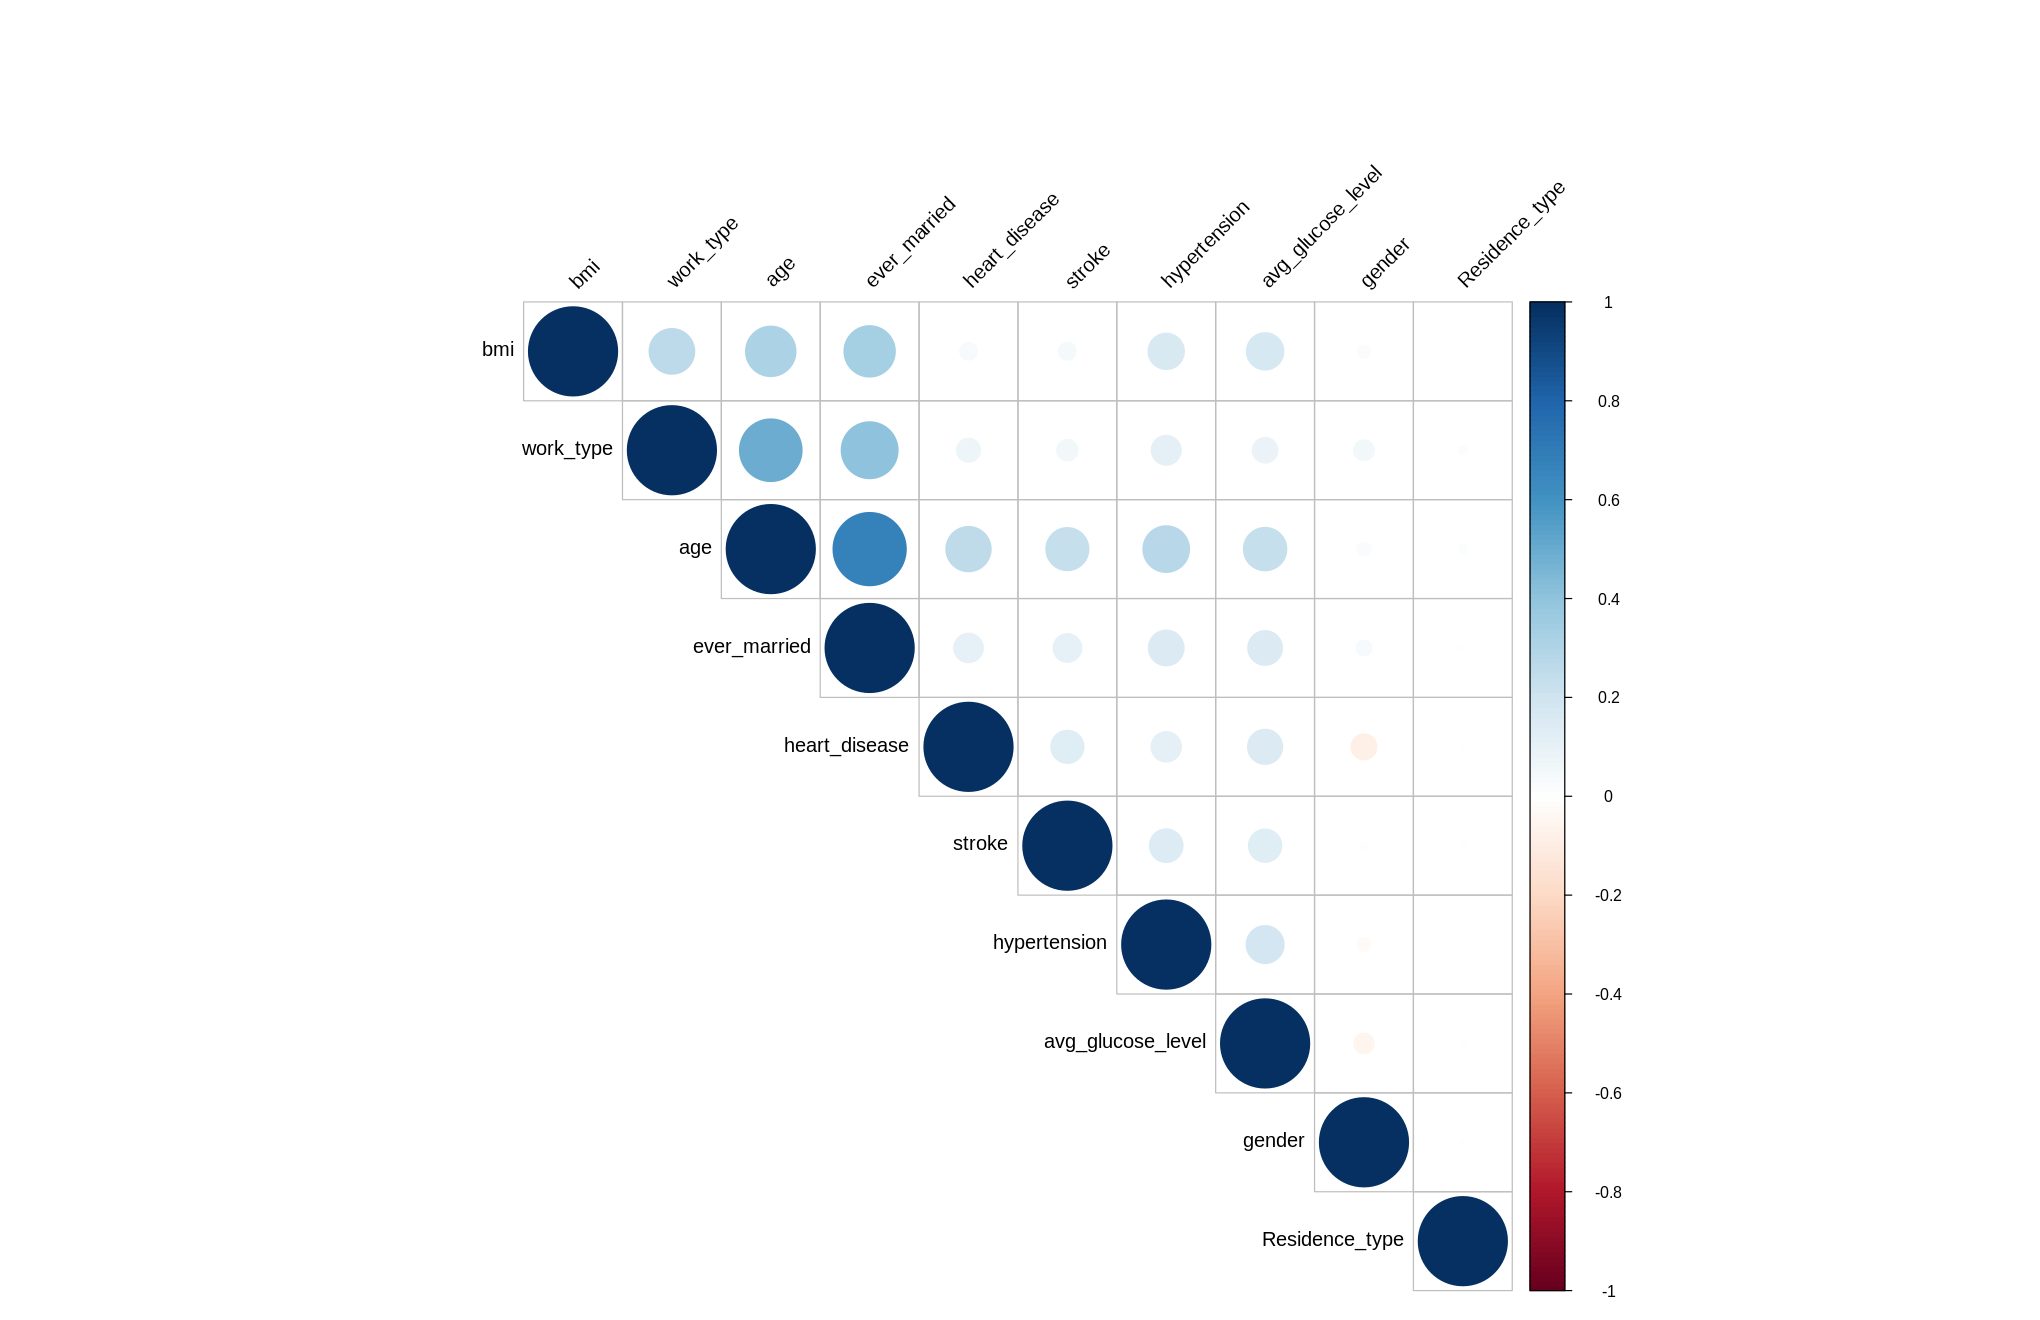

In [ ]:
df_num <- data.frame(data_clean)
df_num$ever_married = str_replace_all(df_num$ever_married, c("Yes"="1", "No"="0"))
df_num$ever_married = as.numeric(df_num$ever_married)

df_num$gender = str_replace_all(df_num$gender, c("Male"="1", "Female"="2"))
df_num$gender = as.numeric(df_num$gender)

df_num$work_type = str_replace_all(df_num$work_type, c("Never_worked"="0","children"="1", "Private"="2", "Self-employed"="3", "Govt_job"="4"))
df_num$work_type = as.numeric(df_num$work_type)

df_num$Residence_type = str_replace_all(df_num$Residence_type, c("Rural"="1", "Urban"="2"))
df_num$Residence_type = as.numeric(df_num$Residence_type)

df_num$stroke = str_replace_all(df_num$stroke, c("yes"="1", "no"="0"))
df_num$stroke = as.numeric(as.character(df_num$stroke))

df_num$heart_disease = str_replace_all(df_num$heart_disease, c("yes"="1", "no"="0"))
df_num$heart_disease = as.numeric(df_num$heart_disease)

df_num$hypertension = str_replace_all(df_num$hypertension, c("yes"="1", "no"="0"))
df_num$hypertension = as.numeric(df_num$hypertension)

df_num$smoking_status = as.numeric(df_num$smoking_status)

drop_smoke<-c("smoking_status","id")
df_num <- df_num[,!(names(df_num) %in% drop_smoke)]


res <- cor(df_num)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

# **Regresi Linier**

`geom_smooth()` using formula 'y ~ x'



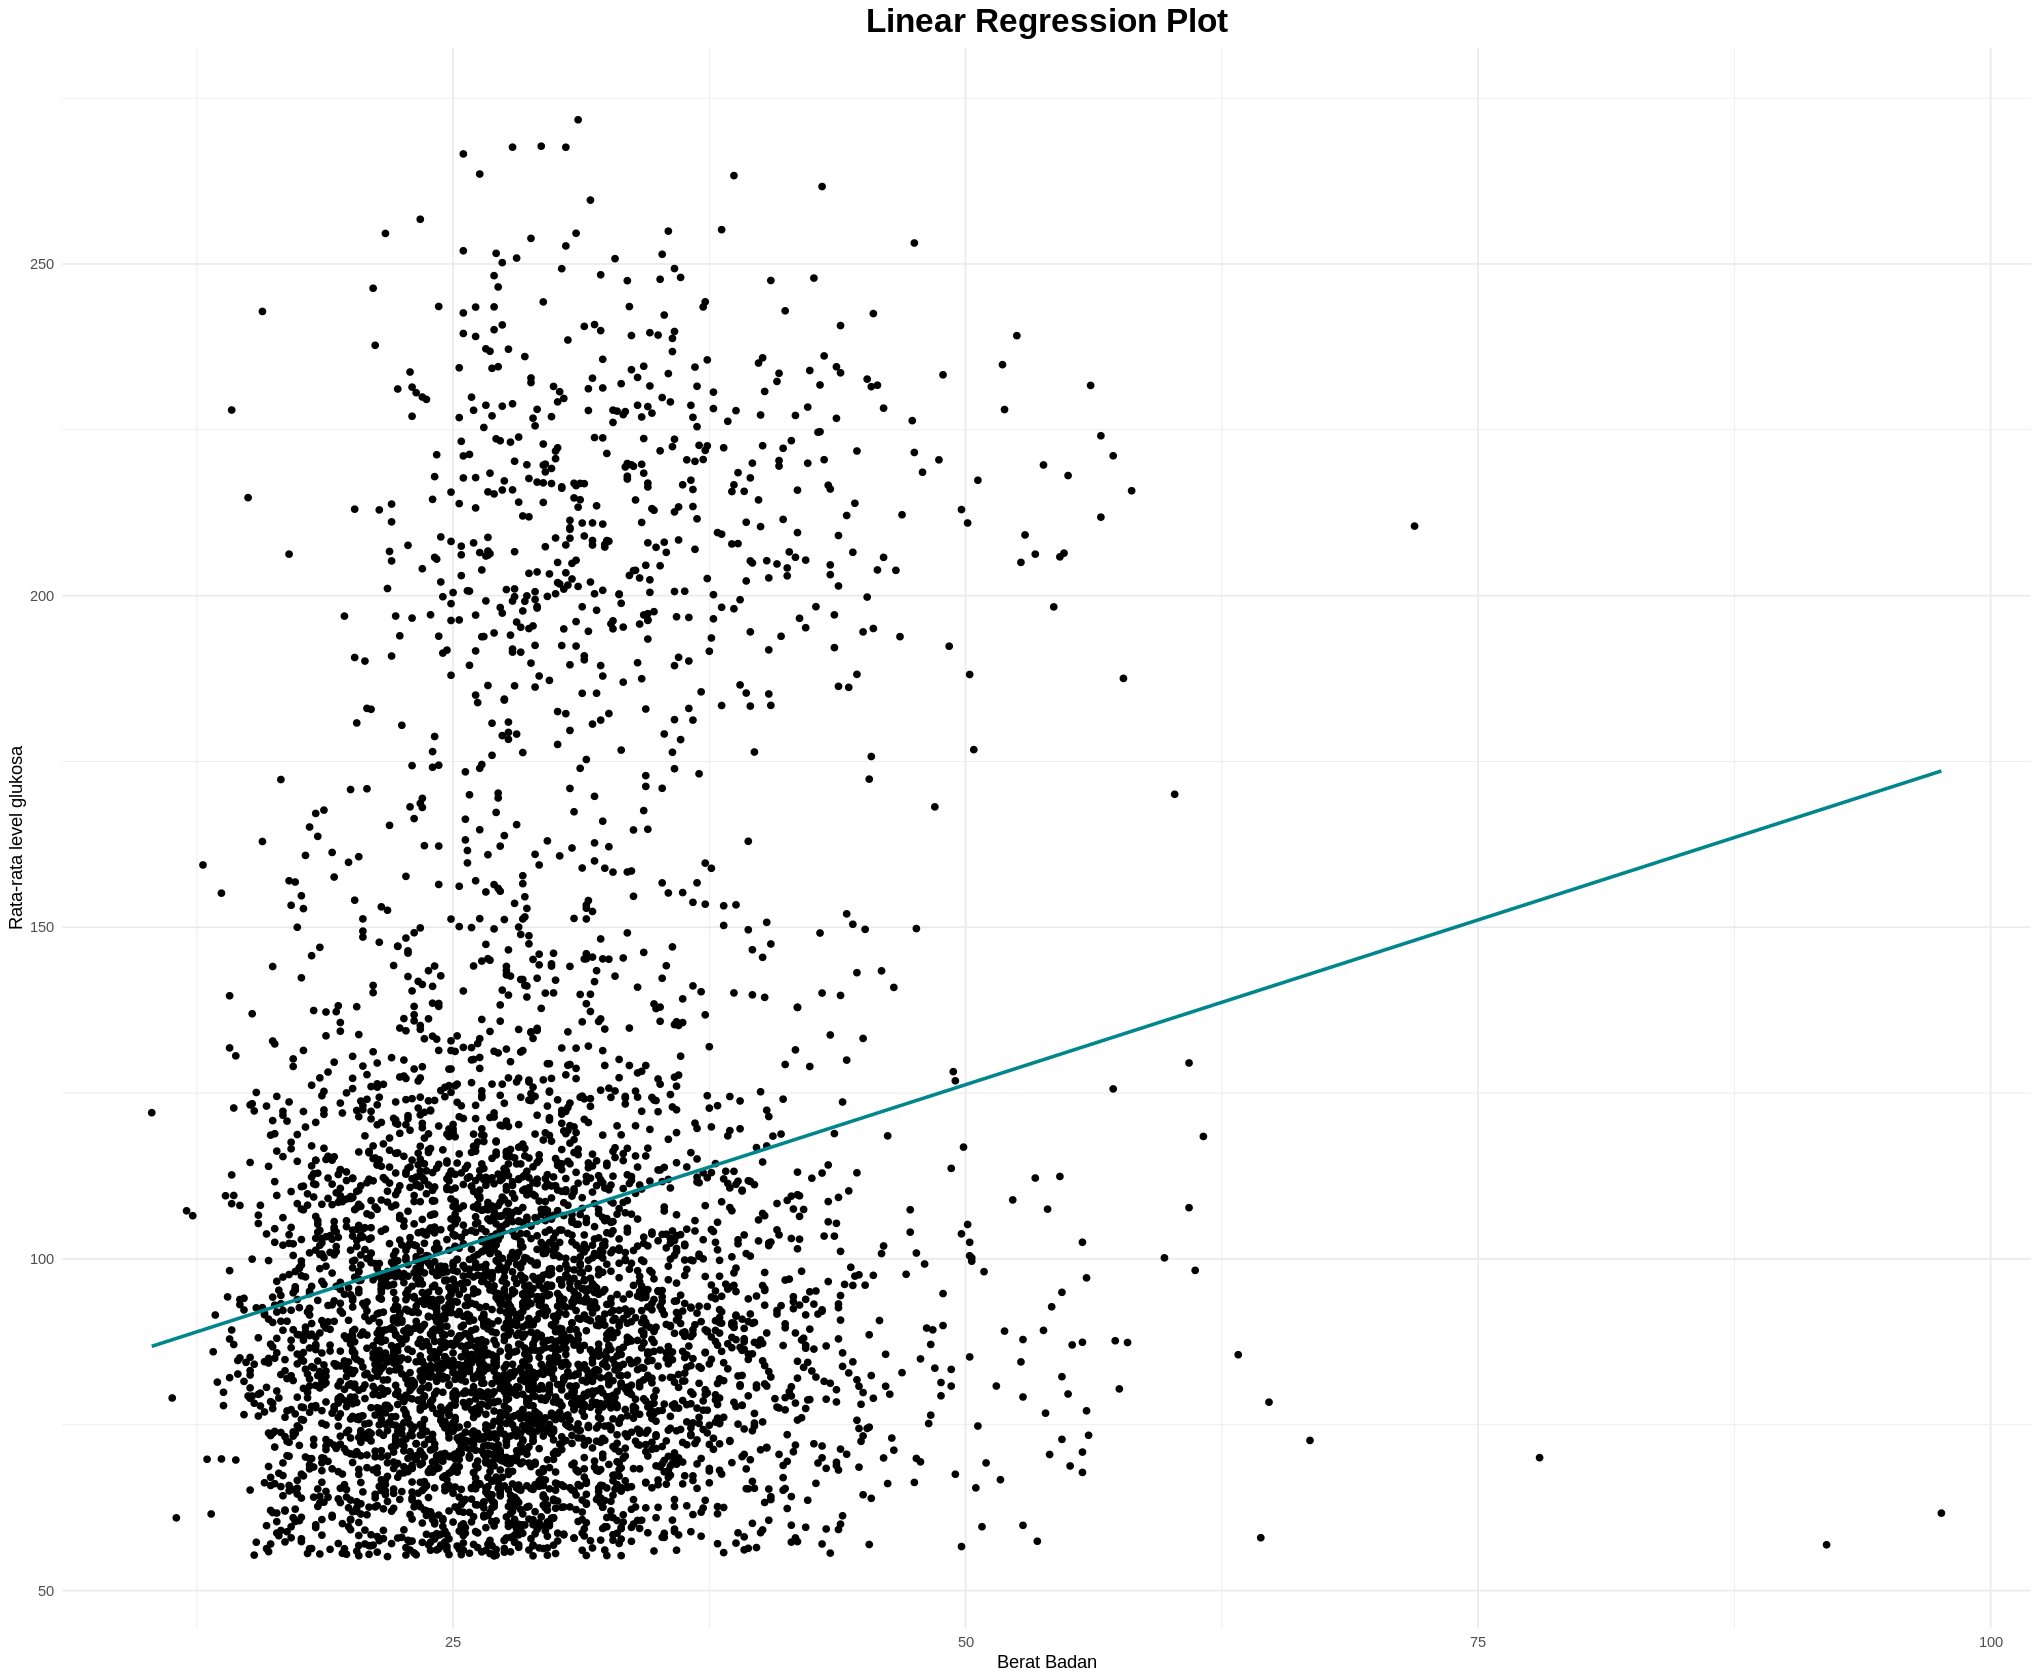

In [ ]:
ggplot(data_clean,aes(bmi, avg_glucose_level)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE, color='turquoise4') +
  theme_minimal() +
  labs(x='Berat Badan', y='Rata-rata level glukosa', title='Linear Regression Plot') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 